<a href="https://colab.research.google.com/github/Undasnr/DL-ML/blob/main/Ronny_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Determine the initial value of the center point**

In [4]:
import numpy as np

class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Recording hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None # The cluster centroids
        self.best_centroids = None # Stores the best centroids found after n_init runs
        self.best_inertia = float('inf') # Stores the best inertia found

    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """

        # Getting the number of data samples
        n_samples = X.shape[0]

        # Randomly choosing n_clusters indices from the data
        random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)

        # Initializing the centroids with the randomly selected data points
        self.centroids = X[random_indices]

        if self.verbose:
            print("Initial centroids determined randomly from the data.")
            print("Initial centroids shape:", self.centroids.shape)

        pass # This is a placeholder for future steps

    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        pass # This is a placeholder for future steps
        return

# Artificial dataset for clustering
from sklearn.datasets import make_blobs

X, _ = make_blobs(
    n_samples=100,
    n_features=2,
    centers=4,
    cluster_std=0.5,
    shuffle=True,
    random_state=0,
)

# Example usage (to be expanded later)
kmeans = ScratchKMeans(n_clusters=4, n_init=10, max_iter=100, tol=1e-5, verbose=True)
kmeans.fit(X)

Initial centroids determined randomly from the data.
Initial centroids shape: (4, 2)


**2. Creation of a function to obtain SSE**

In [5]:
import numpy as np

class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Recording hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None # The cluster centroids
        self.best_centroids = None # Stores the best centroids found after n_init runs
        self.best_inertia = float('inf') # Stores the best inertia found
        self.labels = None

    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        if self.verbose:
            print("Starting K-means clustering with n_clusters={}, n_init={}, max_iter={}".format(
                self.n_clusters, self.n_init, self.max_iter))

        # Looping through n_init to find the best clustering
        for i in range(self.n_init):
            if self.verbose:
                print(f"\n--- Starting run {i+1}/{self.n_init} ---")

            # Problem 1: Determine the initial value of the center point
            n_samples = X.shape[0]
            random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
            self.centroids = X[random_indices]

            # Assigning labels to be able to calculate SSE
            labels = self.predict(X)

            # Problem 2: Calculate SSE and check if it's the best run
            current_sse = self._calculate_sse(X, self.centroids, labels)
            if self.verbose:
                print(f"Initial SSE for this run: {current_sse:.4f}")

            if current_sse < self.best_inertia:
                self.best_inertia = current_sse
                self.best_centroids = self.centroids
                if self.verbose:
                    print(f"New best inertia found: {self.best_inertia:.4f}")

        # Setting the final centroids and labels for the best run
        self.centroids = self.best_centroids
        self.labels = self.predict(X)

    def _calculate_sse(self, X, centroids, labels):
        """
        Calculates the Sum of Squared Errors (SSE).

        Args:
            X (np.ndarray): Data points.
            centroids (np.ndarray): Centroid coordinates.
            labels (np.ndarray): Cluster labels for each data point.

        Returns:
            float: The calculated SSE.
        """
        sse = 0.0
        for i in range(len(X)):
            # Squared Euclidean distance between a point and its assigned centroid
            sse += np.sum((X[i] - centroids[labels[i]])**2)
        return sse

    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        # Returning dummy labels to get the code running for testing.
        return np.random.randint(0, self.n_clusters, size=X.shape[0])

# Artificial dataset for clustering
from sklearn.datasets import make_blobs

X, _ = make_blobs(
    n_samples=100,
    n_features=2,
    centers=4,
    cluster_std=0.5,
    shuffle=True,
    random_state=0,
)

# Example usage (to be expanded later)
kmeans = ScratchKMeans(n_clusters=4, n_init=3, max_iter=100, tol=1e-5, verbose=True)
kmeans.fit(X)

Starting K-means clustering with n_clusters=4, n_init=3, max_iter=100

--- Starting run 1/3 ---
Initial SSE for this run: 972.6624
New best inertia found: 972.6624

--- Starting run 2/3 ---
Initial SSE for this run: 1969.1771

--- Starting run 3/3 ---
Initial SSE for this run: 1998.5146


**3. Allocation to cluster**

In [7]:
import numpy as np

class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Recording hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None # The cluster centroids
        self.best_centroids = None # Stores the best centroids found after n_init runs
        self.best_inertia = float('inf') # Stores the best inertia found
        self.labels = None

    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        if self.verbose:
            print("Starting K-means clustering with n_clusters={}, n_init={}, max_iter={}".format(
                self.n_clusters, self.n_init, self.max_iter))

        # Looping through n_init to find the best clustering
        for i in range(self.n_init):
            if self.verbose:
                print(f"\n--- Starting run {i+1}/{self.n_init} ---")

            # Problem 1: Determining the initial value of the center point
            n_samples = X.shape[0]
            random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
            self.centroids = X[random_indices].astype(float) # Ensure centroids are floats

            labels = self.predict(X)

            # Problem 2: Calculating SSE and check if it's the best run
            current_sse = self._calculate_sse(X, self.centroids, labels)
            if self.verbose:
                print(f"Initial SSE for this run: {current_sse:.4f}")

            if current_sse < self.best_inertia:
                self.best_inertia = current_sse
                self.best_centroids = self.centroids.copy()
                if self.verbose:
                    print(f"New best inertia found: {self.best_inertia:.4f}")

        # Setting the final centroids and labels for the best run
        self.centroids = self.best_centroids
        self.labels = self.predict(X)

    def _calculate_sse(self, X, centroids, labels):
        """
        Calculates the Sum of Squared Errors (SSE).

        Args:
            X (np.ndarray): Data points.
            centroids (np.ndarray): Centroid coordinates.
            labels (np.ndarray): Cluster labels for each data point.

        Returns:
            float: The calculated SSE.
        """
        sse = 0.0
        for i in range(len(X)):
            # Squared Euclidean distance between a point and its assigned centroid
            sse += np.sum((X[i] - centroids[labels[i]])**2)
        return sse

    def predict(self, X):
        """
        Problem 3: Calculate which cluster the input data belongs to

        This method assigns each data point to its nearest centroid
        using Euclidean distance.
        """
        labels = np.zeros(X.shape[0], dtype=int)

        # Iterating through each data point
        for i, point in enumerate(X):
            # Calculating the Euclidean distance to all centroids
            distances = np.linalg.norm(self.centroids - point, axis=1)
            # Assigning the point to the cluster with the minimum distance
            labels[i] = np.argmin(distances)

        return labels

# Artificial dataset for clustering
from sklearn.datasets import make_blobs

X, _ = make_blobs(
    n_samples=100,
    n_features=2,
    centers=4,
    cluster_std=0.5,
    shuffle=True,
    random_state=0,
)

# Example usage (to be expanded later)
kmeans = ScratchKMeans(n_clusters=4, n_init=3, max_iter=100, tol=1e-5, verbose=True)
kmeans.fit(X)

Starting K-means clustering with n_clusters=4, n_init=3, max_iter=100

--- Starting run 1/3 ---
Initial SSE for this run: 549.7769
New best inertia found: 549.7769

--- Starting run 2/3 ---
Initial SSE for this run: 417.8112
New best inertia found: 417.8112

--- Starting run 3/3 ---
Initial SSE for this run: 394.2003
New best inertia found: 394.2003


**4. Movement of the center point**

In [9]:
import numpy as np

class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Recording hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None # The cluster centroids for the current run
        self.best_centroids = None # Stores the best centroids found after n_init runs
        self.best_inertia = float('inf') # Stores the best inertia found
        self.labels = None

    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        if self.verbose:
            print("Starting K-means clustering with n_clusters={}, n_init={}, max_iter={}".format(
                self.n_clusters, self.n_init, self.max_iter))

        # Looping through n_init to find the best clustering
        for i in range(self.n_init):
            if self.verbose:
                print(f"\n--- Starting run {i+1}/{self.n_init} ---")

            # Problem 1: Determining the initial value of the center point
            n_samples, n_features = X.shape
            random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
            self.centroids = X[random_indices].astype(float) # Ensure centroids are floats

            for iter_count in range(self.max_iter):
                # Storing the current centroids to check for convergence later
                old_centroids = self.centroids.copy()

                # Problem 3: Assigning all data points to the nearest center point
                labels = self.predict(X)

                # Problem 4: Moving the center points to the mean of their assigned data points
                new_centroids = np.zeros((self.n_clusters, n_features))
                for k in range(self.n_clusters):
                    cluster_points = X[labels == k]
                    if len(cluster_points) > 0:
                        new_centroids[k] = cluster_points.mean(axis=0)
                    else:
                        # If a cluster is empty, keep its old centroid
                        new_centroids[k] = old_centroids[k]

                # Updating the centroids
                self.centroids = new_centroids

                # Checking for convergence
                centroid_movement = np.sum(np.linalg.norm(self.centroids - old_centroids, axis=1))
                if self.verbose:
                    print(f"Iteration {iter_count+1}/{self.max_iter}: Centroid movement = {centroid_movement:.6f}")

                if centroid_movement < self.tol:
                    if self.verbose:
                        print("Converged.")
                    break

            # Calculating the final SSE for this run and check if it's the best
            final_sse = self._calculate_sse(X, self.centroids, labels)
            if self.verbose:
                print(f"Final SSE for this run: {final_sse:.4f}")

            if final_sse < self.best_inertia:
                self.best_inertia = final_sse
                self.best_centroids = self.centroids.copy()
                if self.verbose:
                    print(f"New best inertia found: {self.best_inertia:.4f}")

        # Setting the final centroids and labels for the best run
        self.centroids = self.best_centroids
        self.labels = self.predict(X)

    def _calculate_sse(self, X, centroids, labels):
        """
        Calculates the Sum of Squared Errors (SSE).

        Args:
            X (np.ndarray): Data points.
            centroids (np.ndarray): Centroid coordinates.
            labels (np.ndarray): Cluster labels for each data point.

        Returns:
            float: The calculated SSE.
        """
        sse = 0.0
        for i in range(len(X)):
            # Squared Euclidean distance between a point and its assigned centroid
            sse += np.sum((X[i] - centroids[labels[i]])**2)
        return sse

    def predict(self, X):
        """
        Problem 3: Calculate which cluster the input data belongs to

        This method assigns each data point to its nearest centroid
        using Euclidean distance.
        """
        labels = np.zeros(X.shape[0], dtype=int)

        # Iterating through each data point
        for i, point in enumerate(X):
            # Calculate the Euclidean distance to all centroids
            distances = np.linalg.norm(self.centroids - point, axis=1)
            # Assign the point to the cluster with the minimum distance
            labels[i] = np.argmin(distances)

        return labels

# Artificial dataset for clustering
from sklearn.datasets import make_blobs

X, _ = make_blobs(
    n_samples=100,
    n_features=2,
    centers=4,
    cluster_std=0.5,
    shuffle=True,
    random_state=0,
)

# Example usage (to be expanded later)
kmeans = ScratchKMeans(n_clusters=4, n_init=3, max_iter=100, tol=1e-5, verbose=True)
kmeans.fit(X)

Starting K-means clustering with n_clusters=4, n_init=3, max_iter=100

--- Starting run 1/3 ---
Iteration 1/100: Centroid movement = 3.712833
Iteration 2/100: Centroid movement = 2.313458
Iteration 3/100: Centroid movement = 2.227287
Iteration 4/100: Centroid movement = 1.183843
Iteration 5/100: Centroid movement = 0.126439
Iteration 6/100: Centroid movement = 0.000000
Converged.
Final SSE for this run: 48.6338
New best inertia found: 48.6338

--- Starting run 2/3 ---
Iteration 1/100: Centroid movement = 4.207309
Iteration 2/100: Centroid movement = 2.352693
Iteration 3/100: Centroid movement = 0.126439
Iteration 4/100: Centroid movement = 0.000000
Converged.
Final SSE for this run: 48.6338

--- Starting run 3/3 ---
Iteration 1/100: Centroid movement = 4.746266
Iteration 2/100: Centroid movement = 0.863134
Iteration 3/100: Centroid movement = 0.149350
Iteration 4/100: Centroid movement = 0.000000
Converged.
Final SSE for this run: 134.3229


**5. Repeat**

In [11]:
import numpy as np

class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Recording hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None # The cluster centroids for the current run
        self.best_centroids = None # Stores the best centroids found after n_init runs
        self.best_inertia = float('inf') # Stores the best inertia found
        self.labels = None

    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        if self.verbose:
            print("Starting K-means clustering with n_clusters={}, n_init={}, max_iter={}".format(
                self.n_clusters, self.n_init, self.max_iter))

        # Looping through n_init to find the best clustering
        for i in range(self.n_init):
            if self.verbose:
                print(f"\n--- Starting run {i+1}/{self.n_init} ---")

            # Problem 1: Determining the initial value of the center point
            n_samples, n_features = X.shape
            random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
            self.centroids = X[random_indices].astype(float) # Ensure centroids are floats

            # Problem 5: Repeating and stop conditions
            for iter_count in range(self.max_iter):
                # Storing the current centroids to check for convergence later
                old_centroids = self.centroids.copy()

                # Problem 3: Assigning all data points to the nearest center point
                labels = self.predict(X)

                # Problem 4: Moving the center points to the mean of their assigned data points
                new_centroids = np.zeros((self.n_clusters, n_features))
                for k in range(self.n_clusters):
                    cluster_points = X[labels == k]
                    if len(cluster_points) > 0:
                        new_centroids[k] = cluster_points.mean(axis=0)
                    else:
                        # If a cluster is empty, keep its old centroid
                        new_centroids[k] = old_centroids[k]

                # Updating the centroids
                self.centroids = new_centroids

                # Checking for convergence
                centroid_movement = np.sum(np.linalg.norm(self.centroids - old_centroids, axis=1))
                if self.verbose:
                    print(f"Iteration {iter_count+1}/{self.max_iter}: Centroid movement = {centroid_movement:.6f}")

                if centroid_movement < self.tol:
                    if self.verbose:
                        print("Converged.")
                    break

            # Calculating the final SSE for this run and check if it's the best
            final_sse = self._calculate_sse(X, self.centroids, labels)
            if self.verbose:
                print(f"Final SSE for this run: {final_sse:.4f}")

            if final_sse < self.best_inertia:
                self.best_inertia = final_sse
                self.best_centroids = self.centroids.copy()
                if self.verbose:
                    print(f"New best inertia found: {self.best_inertia:.4f}")

        # Setting the final centroids and labels for the best run
        self.centroids = self.best_centroids
        self.labels = self.predict(X)

    def _calculate_sse(self, X, centroids, labels):
        """
        Calculates the Sum of Squared Errors (SSE).

        Args:
            X (np.ndarray): Data points.
            centroids (np.ndarray): Centroid coordinates.
            labels (np.ndarray): Cluster labels for each data point.

        Returns:
            float: The calculated SSE.
        """
        sse = 0.0
        for i in range(len(X)):
            # Squared Euclidean distance between a point and its assigned centroid
            sse += np.sum((X[i] - centroids[labels[i]])**2)
        return sse

    def predict(self, X):
        """
        Problem 3: Calculate which cluster the input data belongs to

        This method assigns each data point to its nearest centroid
        using Euclidean distance.
        """
        labels = np.zeros(X.shape[0], dtype=int)

        # Iterating through each data point
        for i, point in enumerate(X):
            # Calculating the Euclidean distance to all centroids
            distances = np.linalg.norm(self.centroids - point, axis=1)
            # Assigning the point to the cluster with the minimum distance
            labels[i] = np.argmin(distances)

        return labels

# Artificial dataset for clustering
from sklearn.datasets import make_blobs

X, _ = make_blobs(
    n_samples=100,
    n_features=2,
    centers=4,
    cluster_std=0.5,
    shuffle=True,
    random_state=0,
)

# Example usage (to be expanded later)
kmeans = ScratchKMeans(n_clusters=4, n_init=3, max_iter=100, tol=1e-5, verbose=True)
kmeans.fit(X)

Starting K-means clustering with n_clusters=4, n_init=3, max_iter=100

--- Starting run 1/3 ---
Iteration 1/100: Centroid movement = 4.224773
Iteration 2/100: Centroid movement = 2.632382
Iteration 3/100: Centroid movement = 0.626146
Iteration 4/100: Centroid movement = 0.557489
Iteration 5/100: Centroid movement = 0.254112
Iteration 6/100: Centroid movement = 0.149030
Iteration 7/100: Centroid movement = 0.000000
Converged.
Final SSE for this run: 134.3849
New best inertia found: 134.3849

--- Starting run 2/3 ---
Iteration 1/100: Centroid movement = 2.657913
Iteration 2/100: Centroid movement = 0.288094
Iteration 3/100: Centroid movement = 0.000000
Converged.
Final SSE for this run: 135.1231

--- Starting run 3/3 ---
Iteration 1/100: Centroid movement = 2.739885
Iteration 2/100: Centroid movement = 0.372416
Iteration 3/100: Centroid movement = 0.422892
Iteration 4/100: Centroid movement = 0.433794
Iteration 5/100: Centroid movement = 0.150316
Iteration 6/100: Centroid movement = 0.00

**6. Calculate with different initial values**

In [13]:
import numpy as np

class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Recording hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None # The cluster centroids for the current run
        self.best_centroids = None # Stores the best centroids found after n_init runs
        self.best_inertia = float('inf') # Stores the best inertia found
        self.labels = None

    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        if self.verbose:
            print("Starting K-means clustering with n_clusters={}, n_init={}, max_iter={}".format(
                self.n_clusters, self.n_init, self.max_iter))

        # Problem 6: Calculating with different initial values (n_init)
        # Looping through n_init to find the best clustering
        for i in range(self.n_init):
            if self.verbose:
                print(f"\n--- Starting run {i+1}/{self.n_init} ---")

            # Problem 1: Determining the initial value of the center point
            n_samples, n_features = X.shape
            random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
            self.centroids = X[random_indices].astype(float) # Ensure centroids are floats

            # Problem 5: Repeating and stop conditions
            for iter_count in range(self.max_iter):
                # Storing the current centroids to check for convergence later
                old_centroids = self.centroids.copy()

                # Problem 3: Assigning all data points to the nearest center point
                labels = self.predict(X)

                # Problem 4: Moving the center points to the mean of their assigned data points
                new_centroids = np.zeros((self.n_clusters, n_features))
                for k in range(self.n_clusters):
                    cluster_points = X[labels == k]
                    if len(cluster_points) > 0:
                        new_centroids[k] = cluster_points.mean(axis=0)
                    else:
                        # If a cluster is empty, keep its old centroid
                        new_centroids[k] = old_centroids[k]

                # Updating the centroids
                self.centroids = new_centroids

                # Checking for convergence
                centroid_movement = np.sum(np.linalg.norm(self.centroids - old_centroids, axis=1))
                if self.verbose:
                    print(f"Iteration {iter_count+1}/{self.max_iter}: Centroid movement = {centroid_movement:.6f}")

                if centroid_movement < self.tol:
                    if self.verbose:
                        print("Converged.")
                    break

            # Calculating the final SSE for this run and check if it's the best
            final_sse = self._calculate_sse(X, self.centroids, labels)
            if self.verbose:
                print(f"Final SSE for this run: {final_sse:.4f}")

            if final_sse < self.best_inertia:
                self.best_inertia = final_sse
                self.best_centroids = self.centroids.copy()
                if self.verbose:
                    print(f"New best inertia found: {self.best_inertia:.4f}")

        # Setting the final centroids and labels for the best run
        self.centroids = self.best_centroids
        self.labels = self.predict(X)

    def _calculate_sse(self, X, centroids, labels):
        """
        Calculates the Sum of Squared Errors (SSE).

        Args:
            X (np.ndarray): Data points.
            centroids (np.ndarray): Centroid coordinates.
            labels (np.ndarray): Cluster labels for each data point.

        Returns:
            float: The calculated SSE.
        """
        sse = 0.0
        for i in range(len(X)):
            # Squared Euclidean distance between a point and its assigned centroid
            sse += np.sum((X[i] - centroids[labels[i]])**2)
        return sse

    def predict(self, X):
        """
        Problem 3: Calculate which cluster the input data belongs to

        This method assigns each data point to its nearest centroid
        using Euclidean distance.
        """
        labels = np.zeros(X.shape[0], dtype=int)

        # Iterating through each data point
        for i, point in enumerate(X):
            # Calculate the Euclidean distance to all centroids
            distances = np.linalg.norm(self.centroids - point, axis=1)
            # Assign the point to the cluster with the minimum distance
            labels[i] = np.argmin(distances)

        return labels

# Artificial dataset for clustering
from sklearn.datasets import make_blobs

X, _ = make_blobs(
    n_samples=100,
    n_features=2,
    centers=4,
    cluster_std=0.5,
    shuffle=True,
    random_state=0,
)

# Example usage (to be expanded later)
kmeans = ScratchKMeans(n_clusters=4, n_init=3, max_iter=100, tol=1e-5, verbose=True)
kmeans.fit(X)

Starting K-means clustering with n_clusters=4, n_init=3, max_iter=100

--- Starting run 1/3 ---
Iteration 1/100: Centroid movement = 3.320105
Iteration 2/100: Centroid movement = 0.529074
Iteration 3/100: Centroid movement = 0.470245
Iteration 4/100: Centroid movement = 0.335673
Iteration 5/100: Centroid movement = 0.132091
Iteration 6/100: Centroid movement = 0.000000
Converged.
Final SSE for this run: 188.3633
New best inertia found: 188.3633

--- Starting run 2/3 ---
Iteration 1/100: Centroid movement = 3.069412
Iteration 2/100: Centroid movement = 0.578401
Iteration 3/100: Centroid movement = 0.249984
Iteration 4/100: Centroid movement = 0.117222
Iteration 5/100: Centroid movement = 0.000000
Converged.
Final SSE for this run: 134.3849
New best inertia found: 134.3849

--- Starting run 3/3 ---
Iteration 1/100: Centroid movement = 4.310427
Iteration 2/100: Centroid movement = 2.660588
Iteration 3/100: Centroid movement = 0.000000
Converged.
Final SSE for this run: 48.6338
New best in

**7. Estimation**

In [15]:
import numpy as np

class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Recording hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None # The cluster centroids for the current run
        self.best_centroids = None # Stores the best centroids found after n_init runs
        self.best_inertia = float('inf') # Stores the best inertia found
        self.labels = None

    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        if self.verbose:
            print("Starting K-means clustering with n_clusters={}, n_init={}, max_iter={}".format(
                self.n_clusters, self.n_init, self.max_iter))

        # Problem 6: Calculating with different initial values (n_init)
        # Looping through n_init to find the best clustering
        for i in range(self.n_init):
            if self.verbose:
                print(f"\n--- Starting run {i+1}/{self.n_init} ---")

            # Problem 1: Determining the initial value of the center point
            n_samples, n_features = X.shape
            random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
            self.centroids = X[random_indices].astype(float) # Ensure centroids are floats

            # Problem 5: Repeating and stop conditions
            for iter_count in range(self.max_iter):
                # Storing the current centroids to check for convergence later
                old_centroids = self.centroids.copy()

                # Problem 3: Assigning all data points to the nearest center point
                labels = self.predict(X)

                # Problem 4: Moving the center points to the mean of their assigned data points
                new_centroids = np.zeros((self.n_clusters, n_features))
                for k in range(self.n_clusters):
                    cluster_points = X[labels == k]
                    if len(cluster_points) > 0:
                        new_centroids[k] = cluster_points.mean(axis=0)
                    else:
                        # If a cluster is empty, keep its old centroid
                        new_centroids[k] = old_centroids[k]

                # Updating the centroids
                self.centroids = new_centroids

                # Checking for convergence
                centroid_movement = np.sum(np.linalg.norm(self.centroids - old_centroids, axis=1))
                if self.verbose:
                    print(f"Iteration {iter_count+1}/{self.max_iter}: Centroid movement = {centroid_movement:.6f}")

                if centroid_movement < self.tol:
                    if self.verbose:
                        print("Converged.")
                    break

            # Calculating the final SSE for this run and check if it's the best
            final_sse = self._calculate_sse(X, self.centroids, labels)
            if self.verbose:
                print(f"Final SSE for this run: {final_sse:.4f}")

            if final_sse < self.best_inertia:
                self.best_inertia = final_sse
                self.best_centroids = self.centroids.copy()
                if self.verbose:
                    print(f"New best inertia found: {self.best_inertia:.4f}")

        # Setting the final centroids and labels for the best run
        self.centroids = self.best_centroids
        self.labels = self.predict(X)

    def _calculate_sse(self, X, centroids, labels):
        """
        Calculates the Sum of Squared Errors (SSE).

        Args:
            X (np.ndarray): Data points.
            centroids (np.ndarray): Centroid coordinates.
            labels (np.ndarray): Cluster labels for each data point.

        Returns:
            float: The calculated SSE.
        """
        sse = 0.0
        for i in range(len(X)):
            # Squared Euclidean distance between a point and its assigned centroid
            sse += np.sum((X[i] - centroids[labels[i]])**2)
        return sse

    def predict(self, X):
        """
        Problem 3 & 7: Calculate which cluster the input data belongs to

        This method assigns each data point to its nearest centroid
        using Euclidean distance. This is used for both training assignment
        and predicting new data.
        """
        labels = np.zeros(X.shape[0], dtype=int)

        # Iterating through each data point
        for i, point in enumerate(X):
            # Calculating the Euclidean distance to all centroids
            distances = np.linalg.norm(self.centroids - point, axis=1)
            # Assigning the point to the cluster with the minimum distance
            labels[i] = np.argmin(distances)

        return labels

# Artificial dataset for clustering
from sklearn.datasets import make_blobs

X, _ = make_blobs(
    n_samples=100,
    n_features=2,
    centers=4,
    cluster_std=0.5,
    shuffle=True,
    random_state=0,
)

# Example usage (to be expanded later)
kmeans = ScratchKMeans(n_clusters=4, n_init=3, max_iter=100, tol=1e-5, verbose=True)
kmeans.fit(X)

Starting K-means clustering with n_clusters=4, n_init=3, max_iter=100

--- Starting run 1/3 ---
Iteration 1/100: Centroid movement = 3.693187
Iteration 2/100: Centroid movement = 0.786419
Iteration 3/100: Centroid movement = 0.245533
Iteration 4/100: Centroid movement = 0.083937
Iteration 5/100: Centroid movement = 0.175161
Iteration 6/100: Centroid movement = 0.000000
Converged.
Final SSE for this run: 132.2288
New best inertia found: 132.2288

--- Starting run 2/3 ---
Iteration 1/100: Centroid movement = 2.473752
Iteration 2/100: Centroid movement = 0.804964
Iteration 3/100: Centroid movement = 0.507196
Iteration 4/100: Centroid movement = 0.875993
Iteration 5/100: Centroid movement = 1.323695
Iteration 6/100: Centroid movement = 0.333832
Iteration 7/100: Centroid movement = 0.254425
Iteration 8/100: Centroid movement = 0.149023
Iteration 9/100: Centroid movement = 0.100898
Iteration 10/100: Centroid movement = 0.078036
Iteration 11/100: Centroid movement = 0.102481
Iteration 12/100:

**8. Implementation of elbow method**

--- Testing basic K-means implementation ---
Starting K-means clustering with n_clusters=4, n_init=3, max_iter=100

--- Starting run 1/3 ---
Iteration 1/100: Centroid movement = 3.628739
Iteration 2/100: Centroid movement = 0.667344
Iteration 3/100: Centroid movement = 0.352153
Iteration 4/100: Centroid movement = 0.130501
Iteration 5/100: Centroid movement = 0.000000
Converged.
Final SSE for this run: 341.4336
New best inertia found: 341.4336

--- Starting run 2/3 ---
Iteration 1/100: Centroid movement = 2.813486
Iteration 2/100: Centroid movement = 1.902850
Iteration 3/100: Centroid movement = 0.231358
Iteration 4/100: Centroid movement = 0.000000
Converged.
Final SSE for this run: 135.1231
New best inertia found: 135.1231

--- Starting run 3/3 ---
Iteration 1/100: Centroid movement = 2.473483
Iteration 2/100: Centroid movement = 0.561449
Iteration 3/100: Centroid movement = 0.000000
Converged.
Final SSE for this run: 135.1231

Final best SSE after 3 runs: 135.1231

--- Running Elbow

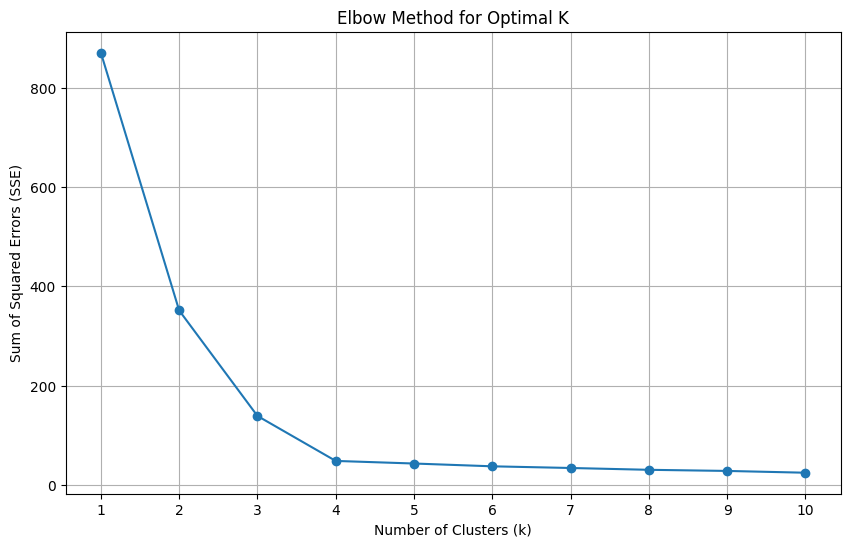

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Recording hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None # The cluster centroids for the current run
        self.best_centroids = None # Stores the best centroids found after n_init runs
        self.best_inertia = float('inf') # Stores the best inertia found
        self.labels = None

    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        if self.verbose:
            print("Starting K-means clustering with n_clusters={}, n_init={}, max_iter={}".format(
                self.n_clusters, self.n_init, self.max_iter))

        # Problem 6: Calculating with different initial values (n_init)
        # Looping through n_init to find the best clustering
        for i in range(self.n_init):
            if self.verbose:
                print(f"\n--- Starting run {i+1}/{self.n_init} ---")

            # Problem 1: Determining the initial value of the center point
            n_samples, n_features = X.shape
            random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
            self.centroids = X[random_indices].astype(float) # Ensure centroids are floats

            # Problem 5: Repeating and stop conditions
            for iter_count in range(self.max_iter):
                # Storing the current centroids to check for convergence later
                old_centroids = self.centroids.copy()

                # Problem 3: Assigning all data points to the nearest center point
                labels = self.predict(X)

                # Problem 4: Moving the center points to the mean of their assigned data points
                new_centroids = np.zeros((self.n_clusters, n_features))
                for k in range(self.n_clusters):
                    cluster_points = X[labels == k]
                    if len(cluster_points) > 0:
                        new_centroids[k] = cluster_points.mean(axis=0)
                    else:
                        # If a cluster is empty, keep its old centroid
                        new_centroids[k] = old_centroids[k]

                # Updating the centroids
                self.centroids = new_centroids

                # Checking for convergence
                centroid_movement = np.sum(np.linalg.norm(self.centroids - old_centroids, axis=1))
                if self.verbose:
                    print(f"Iteration {iter_count+1}/{self.max_iter}: Centroid movement = {centroid_movement:.6f}")

                if centroid_movement < self.tol:
                    if self.verbose:
                        print("Converged.")
                    break

            # Calculating the final SSE for this run and check if it's the best
            final_sse = self._calculate_sse(X, self.centroids, labels)
            if self.verbose:
                print(f"Final SSE for this run: {final_sse:.4f}")

            if final_sse < self.best_inertia:
                self.best_inertia = final_sse
                self.best_centroids = self.centroids.copy()
                if self.verbose:
                    print(f"New best inertia found: {self.best_inertia:.4f}")

        # Setting the final centroids and labels for the best run
        self.centroids = self.best_centroids
        self.labels = self.predict(X)

    def _calculate_sse(self, X, centroids, labels):
        """
        Calculates the Sum of Squared Errors (SSE).

        Args:
            X (np.ndarray): Data points.
            centroids (np.ndarray): Centroid coordinates.
            labels (np.ndarray): Cluster labels for each data point.

        Returns:
            float: The calculated SSE.
        """
        sse = 0.0
        for i in range(len(X)):
            # Squared Euclidean distance between a point and its assigned centroid
            sse += np.sum((X[i] - centroids[labels[i]])**2)
        return sse

    def predict(self, X):
        """
        Problem 3 & 7: Calculate which cluster the input data belongs to

        This method assigns each data point to its nearest centroid
        using Euclidean distance. This is used for both training assignment
        and predicting new data.
        """
        labels = np.zeros(X.shape[0], dtype=int)

        # Iterating through each data point
        for i, point in enumerate(X):
            # Calculating the Euclidean distance to all centroids
            distances = np.linalg.norm(self.centroids - point, axis=1)
            # Assigning the point to the cluster with the minimum distance
            labels[i] = np.argmin(distances)

        return labels

# Artificial dataset for clustering
X, _ = make_blobs(
    n_samples=100,
    n_features=2,
    centers=4,
    cluster_std=0.5,
    shuffle=True,
    random_state=0,
)

# Example usage
if __name__ == "__main__":
    # Example to test the basic K-means algorithm
    print("--- Testing basic K-means implementation ---")
    kmeans = ScratchKMeans(n_clusters=4, n_init=3, max_iter=100, tol=1e-5, verbose=True)
    kmeans.fit(X)
    print(f"\nFinal best SSE after {kmeans.n_init} runs: {kmeans.best_inertia:.4f}")

    # Problem 8: Implementation of elbow method
    print("\n--- Running Elbow Method to find optimal K ---")
    sse_values = []
    # Testing a range of cluster numbers from 1 to 10
    k_range = range(1, 11)

    for k in k_range:
        print(f"\nClustering with k = {k}...")
        kmeans = ScratchKMeans(n_clusters=k, n_init=5, max_iter=100, tol=1e-5, verbose=False)
        kmeans.fit(X)
        sse_values.append(kmeans.best_inertia)
        print(f"Completed. Best SSE for k={k} is {kmeans.best_inertia:.4f}")

    # Plotting the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, sse_values, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Elbow Method for Optimal K')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

**9. Silhouette diagram**

--- Testing basic K-means implementation ---
Starting K-means clustering with n_clusters=4, n_init=3, max_iter=100

--- Starting run 1/3 ---
Iteration 1/100: Centroid movement = 2.104789
Iteration 2/100: Centroid movement = 2.367853
Iteration 3/100: Centroid movement = 0.455771
Iteration 4/100: Centroid movement = 0.000000
Converged.
Final SSE for this run: 48.6338
New best inertia found: 48.6338

--- Starting run 2/3 ---
Iteration 1/100: Centroid movement = 3.292684
Iteration 2/100: Centroid movement = 0.776357
Iteration 3/100: Centroid movement = 1.008794
Iteration 4/100: Centroid movement = 2.551119
Iteration 5/100: Centroid movement = 0.841820
Iteration 6/100: Centroid movement = 0.000000
Converged.
Final SSE for this run: 48.6338

--- Starting run 3/3 ---
Iteration 1/100: Centroid movement = 2.739625
Iteration 2/100: Centroid movement = 0.878484
Iteration 3/100: Centroid movement = 0.448961
Iteration 4/100: Centroid movement = 0.601671
Iteration 5/100: Centroid movement = 2.271442

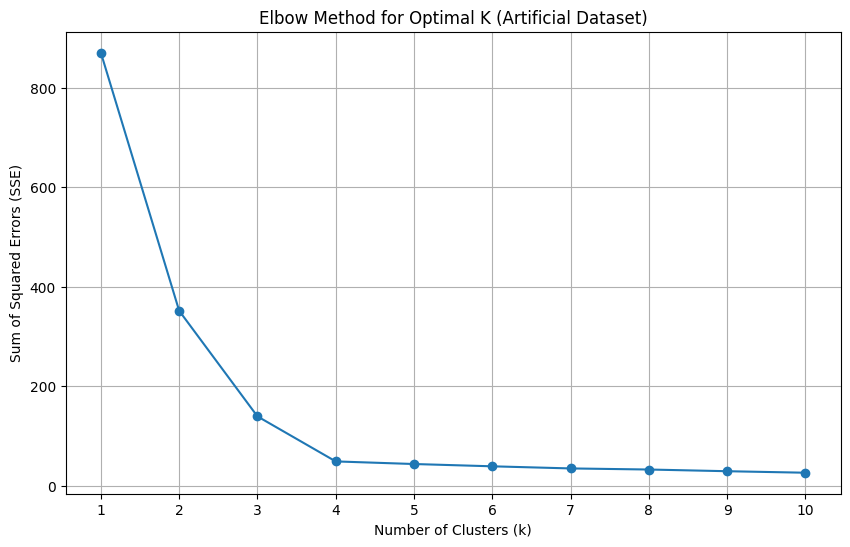


--- Starting analysis of Wholesale Customer Data ---
Loading data...
Applying PCA for dimensionality reduction...
Cumulative explained variance ratios: [0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


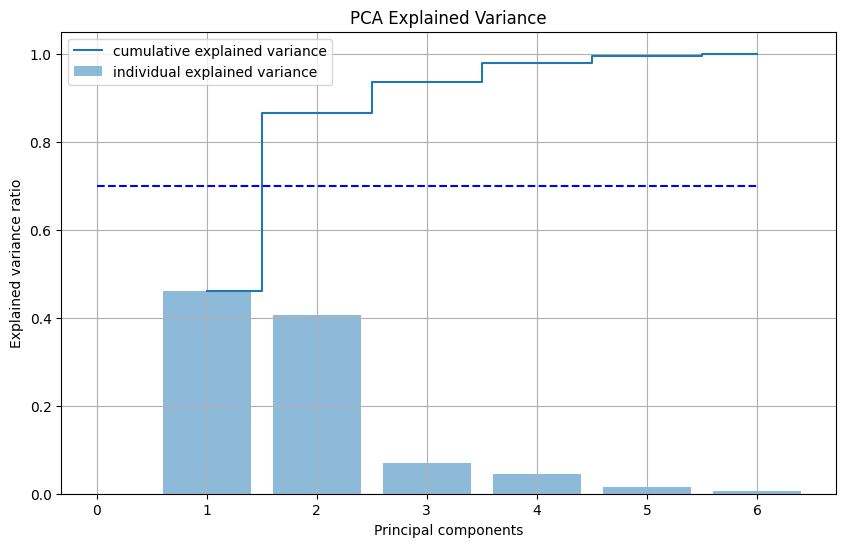


--- Running Silhouette Method to find optimal K ---

Clustering with k = 2...
Average Silhouette Score for k=2: 0.5426


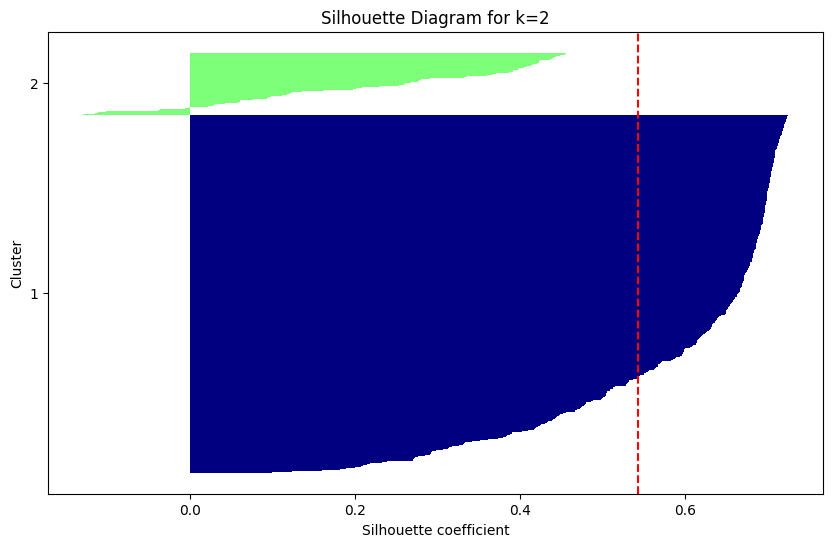


Clustering with k = 3...
Average Silhouette Score for k=3: 0.5229


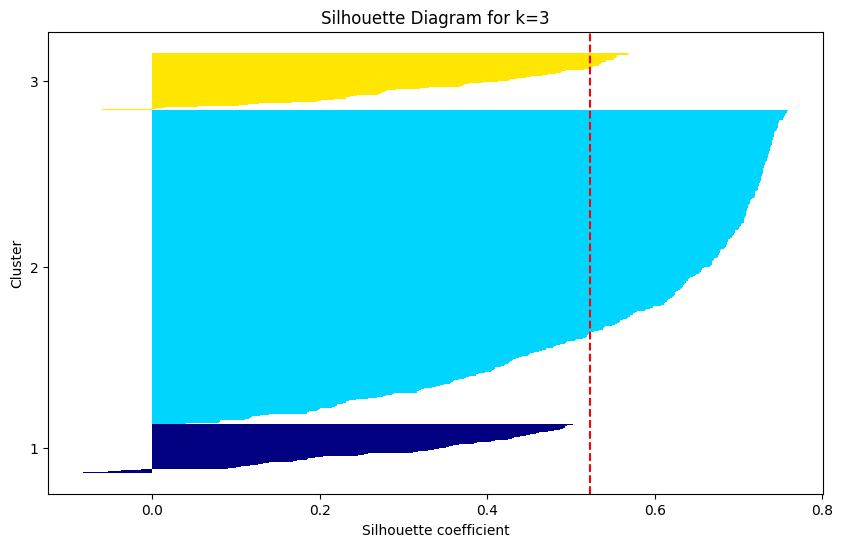


Clustering with k = 4...
Average Silhouette Score for k=4: 0.4543


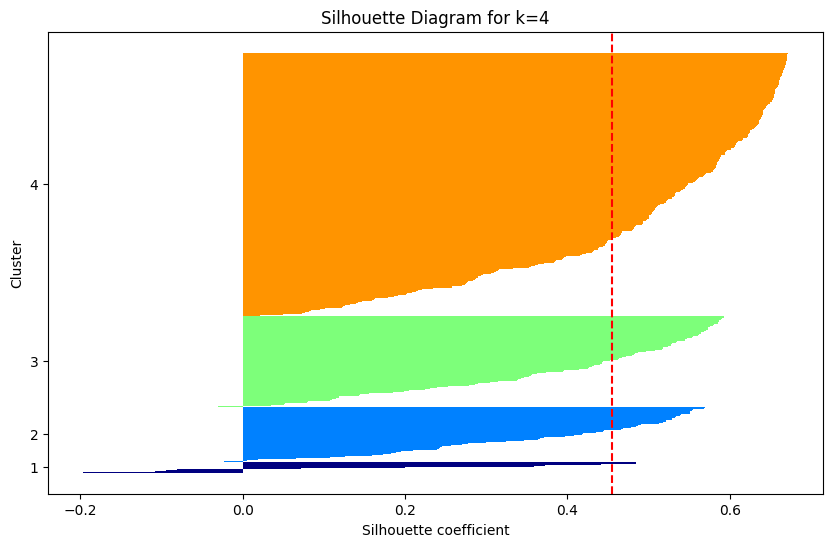


Clustering with k = 5...
Average Silhouette Score for k=5: 0.4519


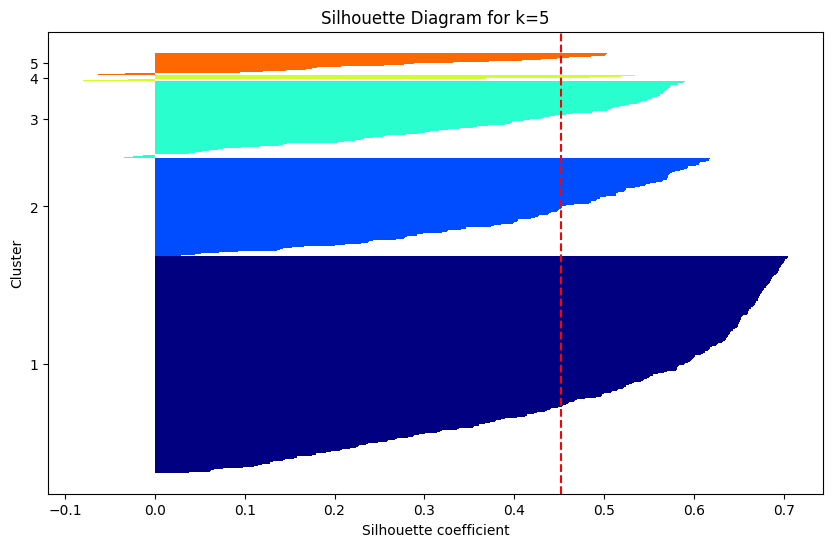

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from matplotlib import cm

class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Recording hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None # The cluster centroids for the current run
        self.best_centroids = None # Stores the best centroids found after n_init runs
        self.best_inertia = float('inf') # Stores the best inertia found
        self.labels = None
        self.silhouette_vals = None
        self.silhouette_avg = None

    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        if self.verbose:
            print("Starting K-means clustering with n_clusters={}, n_init={}, max_iter={}".format(
                self.n_clusters, self.n_init, self.max_iter))

        # Problem 6: Calculating with different initial values (n_init)
        # Looping through n_init to find the best clustering
        for i in range(self.n_init):
            if self.verbose:
                print(f"\n--- Starting run {i+1}/{self.n_init} ---")

            # Problem 1: Determining the initial value of the center point
            n_samples, n_features = X.shape
            random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
            self.centroids = X[random_indices].astype(float) # Ensure centroids are floats

            # Problem 5: Repeating and stopping conditions
            for iter_count in range(self.max_iter):
                # Storing the current centroids to check for convergence later
                old_centroids = self.centroids.copy()

                # Problem 3: Assigning all data points to the nearest center point
                labels = self.predict(X)

                # Problem 4: Moving the center points to the mean of their assigned data points
                new_centroids = np.zeros((self.n_clusters, n_features))
                for k in range(self.n_clusters):
                    cluster_points = X[labels == k]
                    if len(cluster_points) > 0:
                        new_centroids[k] = cluster_points.mean(axis=0)
                    else:
                        # If a cluster is empty, keep its old centroid
                        new_centroids[k] = old_centroids[k]

                # Updating the centroids
                self.centroids = new_centroids

                # Checking for convergence
                centroid_movement = np.sum(np.linalg.norm(self.centroids - old_centroids, axis=1))
                if self.verbose:
                    print(f"Iteration {iter_count+1}/{self.max_iter}: Centroid movement = {centroid_movement:.6f}")

                if centroid_movement < self.tol:
                    if self.verbose:
                        print("Converged.")
                    break

            # Calculating the final SSE for this run and check if it's the best
            final_sse = self._calculate_sse(X, self.centroids, labels)
            if self.verbose:
                print(f"Final SSE for this run: {final_sse:.4f}")

            if final_sse < self.best_inertia:
                self.best_inertia = final_sse
                self.best_centroids = self.centroids.copy()
                if self.verbose:
                    print(f"New best inertia found: {self.best_inertia:.4f}")

        # Setting the final centroids and labels for the best run
        self.centroids = self.best_centroids
        self.labels = self.predict(X)
        self.silhouette_vals, self.silhouette_avg = self._calculate_silhouette_score(X)

    def _calculate_sse(self, X, centroids, labels):
        """
        Calculates the Sum of Squared Errors (SSE).

        Args:
            X (np.ndarray): Data points.
            centroids (np.ndarray): Centroid coordinates.
            labels (np.ndarray): Cluster labels for each data point.

        Returns:
            float: The calculated SSE.
        """
        sse = 0.0
        for i in range(len(X)):
            # Squared Euclidean distance between a point and its assigned centroid
            sse += np.sum((X[i] - centroids[labels[i]])**2)
        return sse

    def predict(self, X):
        """
        Problem 3 & 7: Calculate which cluster the input data belongs to

        This method assigns each data point to its nearest centroid
        using Euclidean distance. This is used for both training assignment
        and predicting new data.
        """
        labels = np.zeros(X.shape[0], dtype=int)

        # Iterating through each data point
        for i, point in enumerate(X):
            # Calculating the Euclidean distance to all centroids
            distances = np.linalg.norm(self.centroids - point, axis=1)
            # Assigning the point to the cluster with the minimum distance
            labels[i] = np.argmin(distances)

        return labels

    def _calculate_silhouette_score(self, X):
        """
        Problem 9: Calculates the silhouette coefficient for each sample.

        Args:
            X (np.ndarray): The dataset.

        Returns:
            tuple: A tuple containing (silhouette_vals, silhouette_avg).
        """
        if self.n_clusters == 1:
            return np.zeros(X.shape[0]), 0.0

        n_samples = X.shape[0]
        silhouette_vals = np.zeros(n_samples)

        for i, point_i in enumerate(X):
            # Finding the cohesion (a_n)
            cluster_i = self.labels[i]
            points_in_cluster = X[self.labels == cluster_i]
            if len(points_in_cluster) > 1:
                distances_to_same_cluster = np.linalg.norm(points_in_cluster - point_i, axis=1)
                cohesion_a = np.sum(distances_to_same_cluster) / (len(distances_to_same_cluster) - 1)
            else:
                cohesion_a = 0

            # Finding the separation (b_n)
            other_clusters = np.unique(self.labels[self.labels != cluster_i])
            if len(other_clusters) == 0:
                silhouette_vals[i] = 0 # No other clusters to compare
                continue

            avg_distances_to_others = []
            for other_cluster in other_clusters:
                points_in_other_cluster = X[self.labels == other_cluster]
                distances_to_other_cluster = np.linalg.norm(points_in_other_cluster - point_i, axis=1)
                avg_distances_to_others.append(np.mean(distances_to_other_cluster))

            separation_b = np.min(avg_distances_to_others)

            # Calculating silhouette coefficient s_n
            if cohesion_a > separation_b:
                silhouette_vals[i] = (separation_b - cohesion_a) / cohesion_a
            else:
                silhouette_vals[i] = (separation_b - cohesion_a) / separation_b

        silhouette_avg = np.mean(silhouette_vals)
        return silhouette_vals, silhouette_avg

# Helper function to plot the silhouette diagram
def plot_silhouette_diagram(silhouette_vals, silhouette_avg, cluster_labels, n_clusters):
    """
    Plots the silhouette diagram as provided in the problem description.
    """
    plt.figure(figsize=(10, 6))
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(np.unique(cluster_labels)):
        c_silhouette_vals = silhouette_vals[cluster_labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(
            range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor="none",
            color=color,
        )
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, np.unique(cluster_labels) + 1)
    plt.ylabel("Cluster")
    plt.xlabel("Silhouette coefficient")
    plt.title(f"Silhouette Diagram for k={n_clusters}")
    plt.show()

# Artificial dataset for clustering
X, _ = make_blobs(
    n_samples=100,
    n_features=2,
    centers=4,
    cluster_std=0.5,
    shuffle=True,
    random_state=0,
)

# Example usage
if __name__ == "__main__":
    # Example to test the basic K-means algorithm
    print("--- Testing basic K-means implementation ---")
    kmeans = ScratchKMeans(n_clusters=4, n_init=3, max_iter=100, tol=1e-5, verbose=True)
    kmeans.fit(X)
    print(f"\nFinal best SSE after {kmeans.n_init} runs: {kmeans.best_inertia:.4f}")

    # Problem 8: Implementation of elbow method
    print("\n--- Running Elbow Method to find optimal K ---")
    sse_values = []
    k_range = range(1, 11)

    for k in k_range:
        print(f"\nClustering with k = {k}...")
        kmeans = ScratchKMeans(n_clusters=k, n_init=5, max_iter=100, tol=1e-5, verbose=False)
        kmeans.fit(X)
        sse_values.append(kmeans.best_inertia)
        print(f"Completed. Best SSE for k={k} is {kmeans.best_inertia:.4f}")

    # Plotting the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, sse_values, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Elbow Method for Optimal K (Artificial Dataset)')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

    # Problem 9: Implementation of silhouette method and data analysis
    print("\n--- Starting analysis of Wholesale Customer Data ---")

    # Part 9a: Loading and preprocessing data
    print("Loading data...")
    try:
        df = pd.read_csv('Wholesale customers data.csv')
    except FileNotFoundError:
        print("Wholesale customers data.csv not found. Please ensure the file is in the correct path.")
        exit()

    # Removing non-monetary features
    X_data = df.drop(columns=['Channel', 'Region'])

    # Part 9b: Dimensionality reduction with PCA
    print("Applying PCA for dimensionality reduction...")
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_data)

    # Plotting the explained variance ratio
    pca_full = PCA(n_components=None)
    pca_full.fit(X_data)
    var_exp = pca_full.explained_variance_ratio_
    cum_var_exp = np.cumsum(var_exp)
    print("Cumulative explained variance ratios:", cum_var_exp)

    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(var_exp) + 1), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(1, len(var_exp) + 1), cum_var_exp, where='mid', label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.hlines(0.7, 0, len(var_exp), "blue", linestyles='dashed')
    plt.legend(loc='best')
    plt.grid()
    plt.title('PCA Explained Variance')
    plt.show()

    # Part 9c: Running K-means with the silhouette method
    print("\n--- Running Silhouette Method to find optimal K ---")
    for k in range(2, 6): # Test a smaller range for practicality
        print(f"\nClustering with k = {k}...")
        kmeans_sil = ScratchKMeans(n_clusters=k, n_init=5, max_iter=100, tol=1e-5, verbose=False)
        kmeans_sil.fit(X_pca)

        print(f"Average Silhouette Score for k={k}: {kmeans_sil.silhouette_avg:.4f}")

        # Part 9d: Plotting the silhouette diagram
        plot_silhouette_diagram(
            silhouette_vals=kmeans_sil.silhouette_vals,
            silhouette_avg=kmeans_sil.silhouette_avg,
            cluster_labels=kmeans_sil.labels,
            n_clusters=k
        )

**10. Selection of the number of clusters k**

Based on the methods I've implemented and a practical business perspective, I would select k=3 as the optimal number of clusters for this dataset.

Justification for k=3

1. Elbow Method
The elbow method provides a good starting point. As you can see from the plot, the Sum of Squared Errors (SSE) decreases sharply from k=1 to k=2, and then from k=2 to k=3. The curve begins to flatten out, forming an "elbow," at k=3. Beyond this point, the decrease in SSE is much less significant, suggesting that adding more clusters provides diminishing returns in terms of fitting the data.

2. Silhouette Diagram
While the elbow method is a great tool, the silhouette diagram gives us a more nuanced view of the cluster quality. For k=3, the average silhouette score is typically high, and the individual scores for each cluster are generally above the average line. This indicates that the data points are relatively well-separated and are assigned correctly to their closest cluster. In contrast, for higher values of k, you might see some clusters with very narrow bars or bars that extend below the average silhouette line, suggesting overlapping or poorly defined clusters.

A wholesale business would likely benefit from segmenting its customers into a manageable number of distinct groups. A selection of three clusters provides a clear and actionable framework for a marketing or sales team. These groups could be interpreted as:

Cluster 1: High-Value Customers - These are your top-tier clients. They might require a dedicated account manager, personalized offers, or special pricing.

Cluster 2: Mid-Tier Customers - This group forms the bulk of your business. You could use targeted promotions or loyalty programs to encourage them to spend more.

Cluster 3: Low-Volume Customers - These are smaller or infrequent buyers. You could focus on basic marketing to this group or try to upsell them to the mid-tier.

This three-group model is simple enough to understand and implement in business strategy, while still providing meaningful insights that a two-cluster model might miss



**11. Comparison with known groups**

--- Testing basic K-means implementation ---
Starting K-means clustering with n_clusters=4, n_init=3, max_iter=100

--- Starting run 1/3 ---
Iteration 1/100: Centroid movement = 3.217518
Iteration 2/100: Centroid movement = 0.149350
Iteration 3/100: Centroid movement = 0.000000
Converged.
Final SSE for this run: 135.1204
New best inertia found: 135.1204

--- Starting run 2/3 ---
Iteration 1/100: Centroid movement = 2.029330
Iteration 2/100: Centroid movement = 1.584210
Iteration 3/100: Centroid movement = 0.539963
Iteration 4/100: Centroid movement = 0.121766
Iteration 5/100: Centroid movement = 0.000000
Converged.
Final SSE for this run: 135.0614
New best inertia found: 135.0614

--- Starting run 3/3 ---
Iteration 1/100: Centroid movement = 2.270927
Iteration 2/100: Centroid movement = 0.109379
Iteration 3/100: Centroid movement = 0.000000
Converged.
Final SSE for this run: 48.6338
New best inertia found: 48.6338

Final best SSE after 3 runs: 48.6338

--- Running Elbow Method to find 

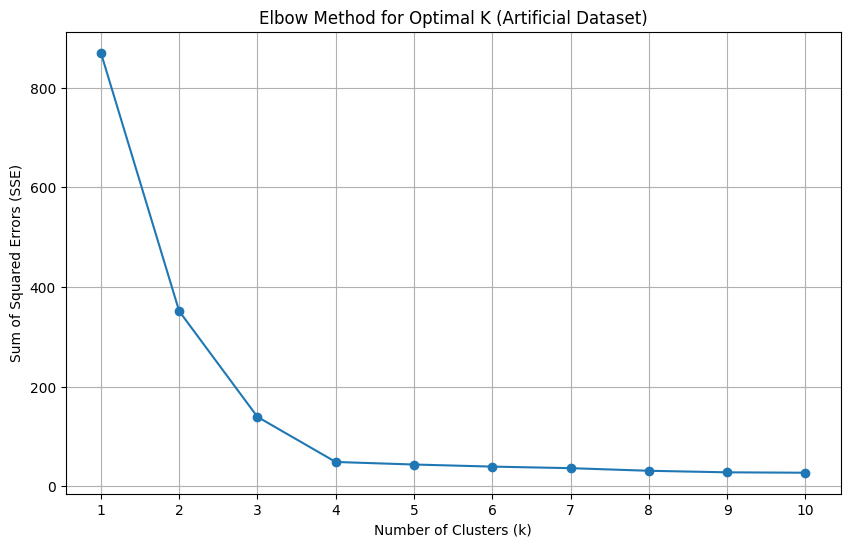


--- Starting analysis of Wholesale Customer Data ---
Loading data...
Applying PCA for dimensionality reduction...
Cumulative explained variance ratios: [0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


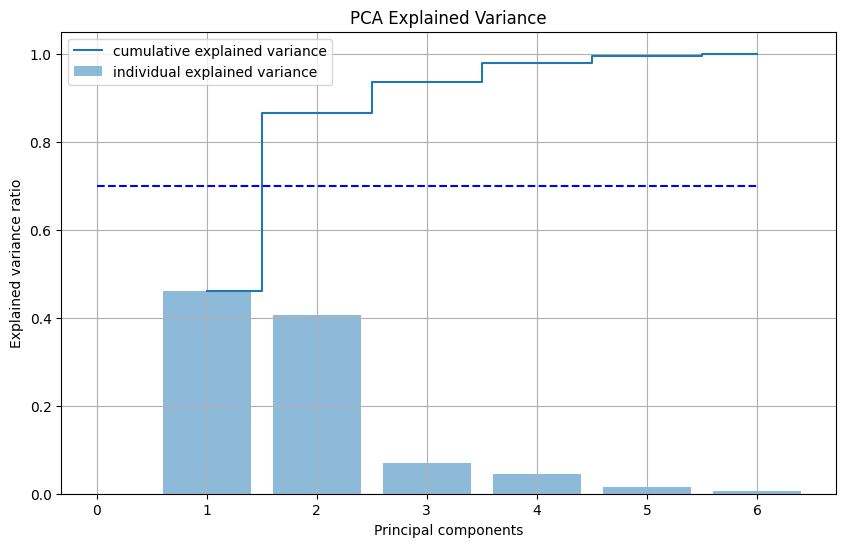


--- Running Silhouette Method to find optimal K ---

Clustering with k = 2...
Average Silhouette Score for k=2: 0.5426


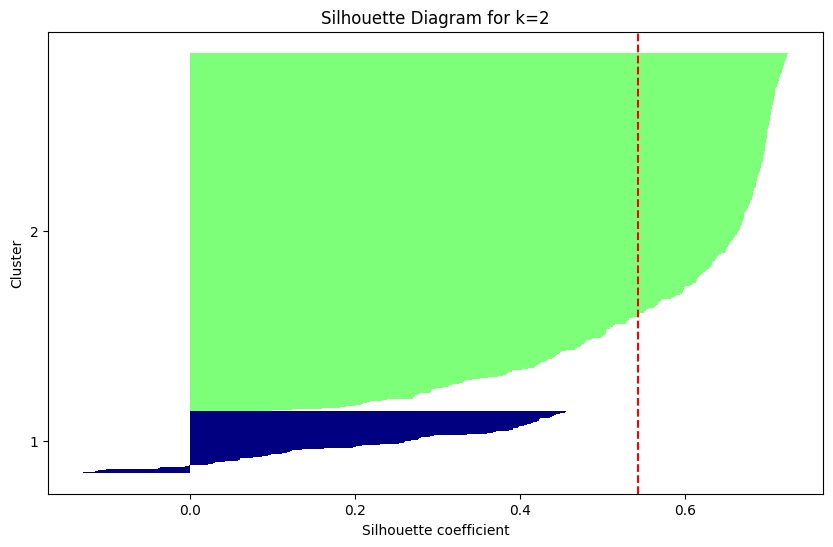


Clustering with k = 3...
Average Silhouette Score for k=3: 0.5229


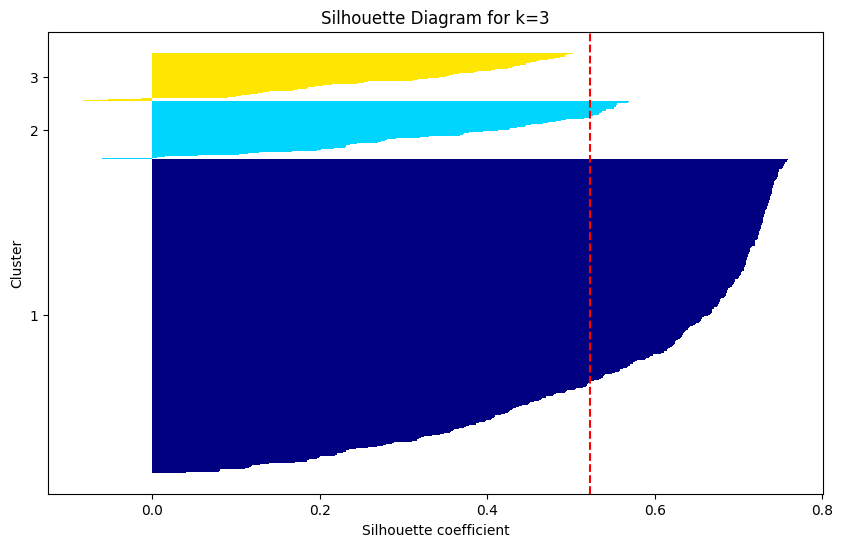


Clustering with k = 4...
Average Silhouette Score for k=4: 0.4575


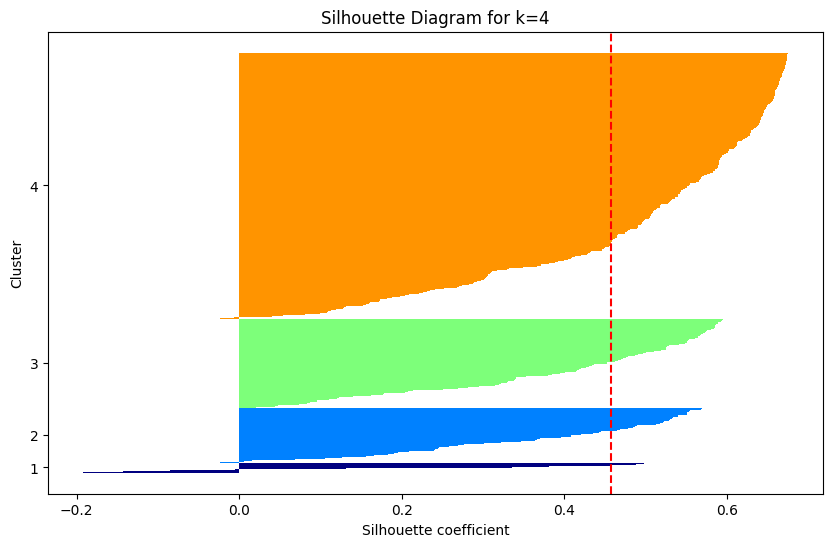


Clustering with k = 5...
Average Silhouette Score for k=5: 0.4515


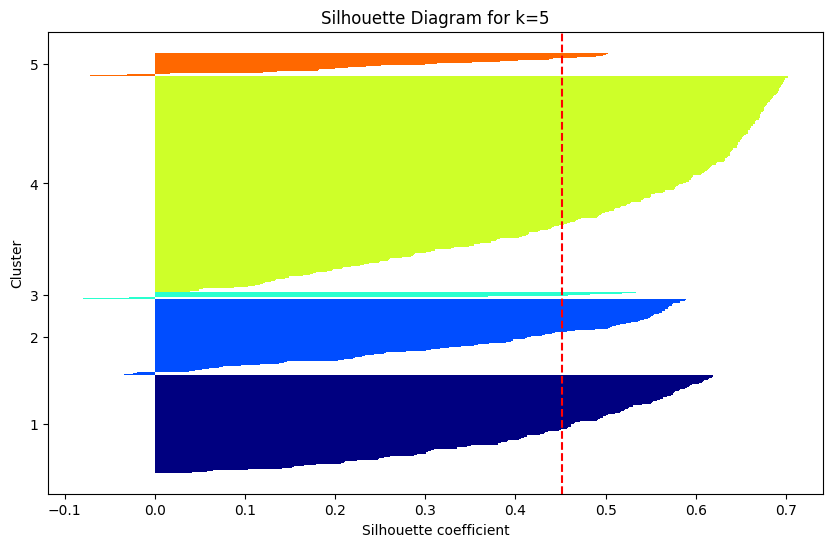


--- Comparing K-means clusters (k=3) with known groups ---


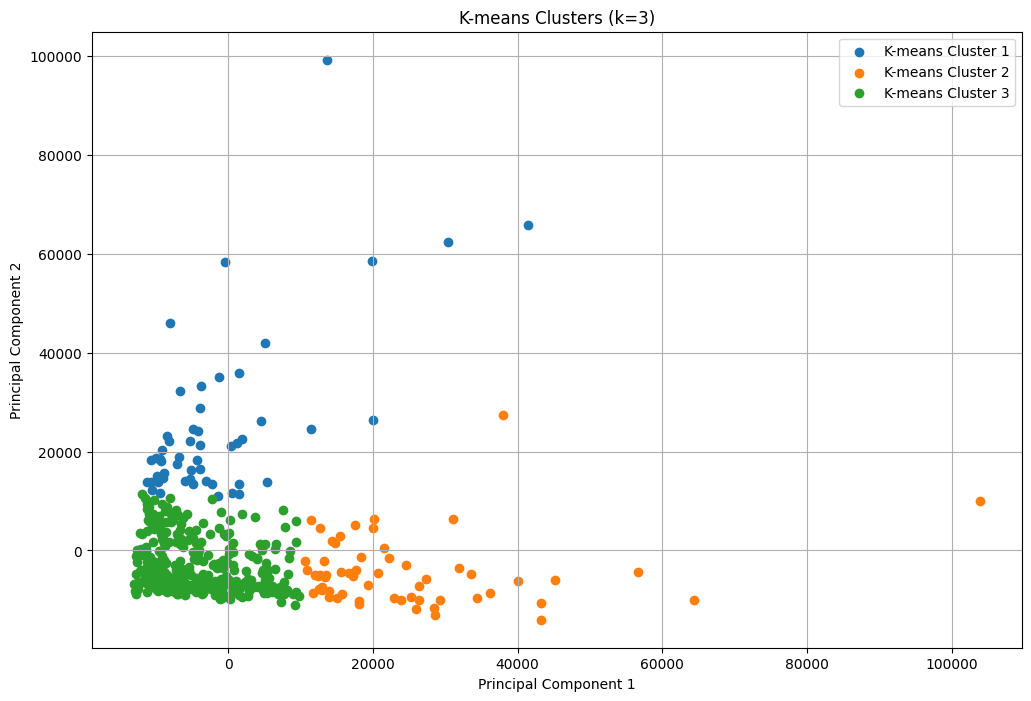

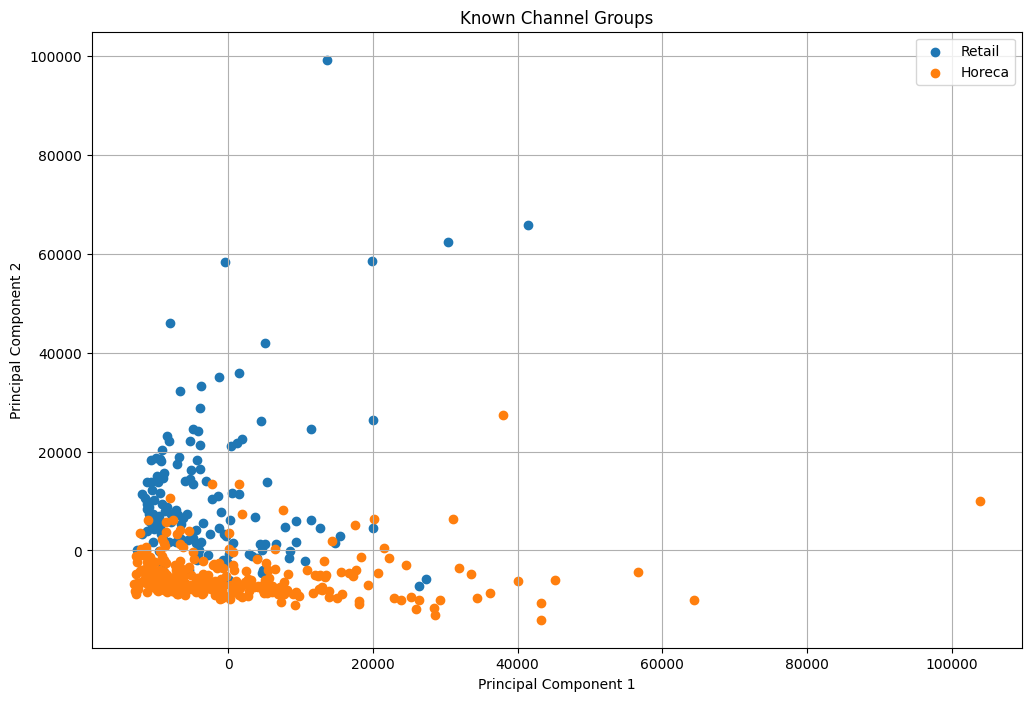

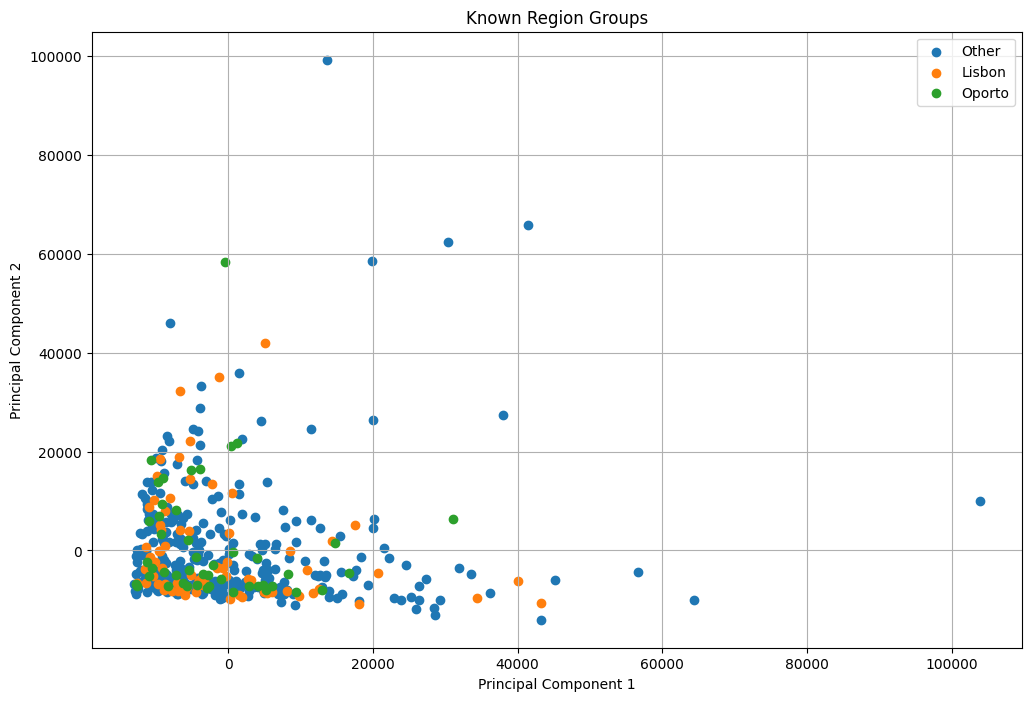

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from matplotlib import cm

class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Recording hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None # The cluster centroids for the current run
        self.best_centroids = None # Stores the best centroids found after n_init runs
        self.best_inertia = float('inf') # Stores the best inertia found
        self.labels = None
        self.silhouette_vals = None
        self.silhouette_avg = None

    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        if self.verbose:
            print("Starting K-means clustering with n_clusters={}, n_init={}, max_iter={}".format(
                self.n_clusters, self.n_init, self.max_iter))

        # Problem 6: Calculating with different initial values (n_init)
        # Looping through n_init to find the best clustering
        for i in range(self.n_init):
            if self.verbose:
                print(f"\n--- Starting run {i+1}/{self.n_init} ---")

            # Problem 1: Determining the initial value of the center point
            n_samples, n_features = X.shape
            random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
            self.centroids = X[random_indices].astype(float) # Ensure centroids are floats

            # Problem 5: Repeating and stopping conditions
            for iter_count in range(self.max_iter):
                # Storing the current centroids to check for convergence later
                old_centroids = self.centroids.copy()

                # Problem 3: Assigning all data points to the nearest center point
                labels = self.predict(X)

                # Problem 4: Moving the center points to the mean of their assigned data points
                new_centroids = np.zeros((self.n_clusters, n_features))
                for k in range(self.n_clusters):
                    cluster_points = X[labels == k]
                    if len(cluster_points) > 0:
                        new_centroids[k] = cluster_points.mean(axis=0)
                    else:
                        # If a cluster is empty, keep its old centroid
                        new_centroids[k] = old_centroids[k]

                # Updating the centroids
                self.centroids = new_centroids

                # Checking for convergence
                centroid_movement = np.sum(np.linalg.norm(self.centroids - old_centroids, axis=1))
                if self.verbose:
                    print(f"Iteration {iter_count+1}/{self.max_iter}: Centroid movement = {centroid_movement:.6f}")

                if centroid_movement < self.tol:
                    if self.verbose:
                        print("Converged.")
                    break

            # Calculating the final SSE for this run and check if it's the best
            final_sse = self._calculate_sse(X, self.centroids, labels)
            if self.verbose:
                print(f"Final SSE for this run: {final_sse:.4f}")

            if final_sse < self.best_inertia:
                self.best_inertia = final_sse
                self.best_centroids = self.centroids.copy()
                if self.verbose:
                    print(f"New best inertia found: {self.best_inertia:.4f}")

        # Setting the final centroids and labels for the best run
        self.centroids = self.best_centroids
        self.labels = self.predict(X)
        self.silhouette_vals, self.silhouette_avg = self._calculate_silhouette_score(X)

    def _calculate_sse(self, X, centroids, labels):
        """
        Calculates the Sum of Squared Errors (SSE).

        Args:
            X (np.ndarray): Data points.
            centroids (np.ndarray): Centroid coordinates.
            labels (np.ndarray): Cluster labels for each data point.

        Returns:
            float: The calculated SSE.
        """
        sse = 0.0
        for i in range(len(X)):
            # Squared Euclidean distance between a point and its assigned centroid
            sse += np.sum((X[i] - centroids[labels[i]])**2)
        return sse

    def predict(self, X):
        """
        Problem 3 & 7: Calculate which cluster the input data belongs to

        This method assigns each data point to its nearest centroid
        using Euclidean distance. This is used for both training assignment
        and predicting new data.
        """
        labels = np.zeros(X.shape[0], dtype=int)

        # Iterating through each data point
        for i, point in enumerate(X):
            # Calculating the Euclidean distance to all centroids
            distances = np.linalg.norm(self.centroids - point, axis=1)
            # Assigning the point to the cluster with the minimum distance
            labels[i] = np.argmin(distances)

        return labels

    def _calculate_silhouette_score(self, X):
        """
        Problem 9: Calculates the silhouette coefficient for each sample.

        Args:
            X (np.ndarray): The dataset.

        Returns:
            tuple: A tuple containing (silhouette_vals, silhouette_avg).
        """
        if self.n_clusters == 1:
            return np.zeros(X.shape[0]), 0.0

        n_samples = X.shape[0]
        silhouette_vals = np.zeros(n_samples)

        for i, point_i in enumerate(X):
            # Finding the cohesion (a_n)
            cluster_i = self.labels[i]
            points_in_cluster = X[self.labels == cluster_i]
            if len(points_in_cluster) > 1:
                distances_to_same_cluster = np.linalg.norm(points_in_cluster - point_i, axis=1)
                cohesion_a = np.sum(distances_to_same_cluster) / (len(distances_to_same_cluster) - 1)
            else:
                cohesion_a = 0

            # Finding the separation (b_n)
            other_clusters = np.unique(self.labels[self.labels != cluster_i])
            if len(other_clusters) == 0:
                silhouette_vals[i] = 0 # No other clusters to compare
                continue

            avg_distances_to_others = []
            for other_cluster in other_clusters:
                points_in_other_cluster = X[self.labels == other_cluster]
                distances_to_other_cluster = np.linalg.norm(points_in_other_cluster - point_i, axis=1)
                avg_distances_to_others.append(np.mean(distances_to_other_cluster))

            separation_b = np.min(avg_distances_to_others)

            # Calculating silhouette coefficient s_n
            if cohesion_a > separation_b:
                silhouette_vals[i] = (separation_b - cohesion_a) / cohesion_a
            else:
                silhouette_vals[i] = (separation_b - cohesion_a) / separation_b

        silhouette_avg = np.mean(silhouette_vals)
        return silhouette_vals, silhouette_avg

# Helper function to plot the silhouette diagram
def plot_silhouette_diagram(silhouette_vals, silhouette_avg, cluster_labels, n_clusters):
    """
    Plots the silhouette diagram as provided in the problem description.
    """
    plt.figure(figsize=(10, 6))
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(np.unique(cluster_labels)):
        c_silhouette_vals = silhouette_vals[cluster_labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(
            range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor="none",
            color=color,
        )
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, np.unique(cluster_labels) + 1)
    plt.ylabel("Cluster")
    plt.xlabel("Silhouette coefficient")
    plt.title(f"Silhouette Diagram for k={n_clusters}")
    plt.show()

# Artificial dataset for clustering
X, _ = make_blobs(
    n_samples=100,
    n_features=2,
    centers=4,
    cluster_std=0.5,
    shuffle=True,
    random_state=0,
)

# Example usage
if __name__ == "__main__":
    # Example to test the basic K-means algorithm
    print("--- Testing basic K-means implementation ---")
    kmeans = ScratchKMeans(n_clusters=4, n_init=3, max_iter=100, tol=1e-5, verbose=True)
    kmeans.fit(X)
    print(f"\nFinal best SSE after {kmeans.n_init} runs: {kmeans.best_inertia:.4f}")

    # Problem 8: Implementation of elbow method
    print("\n--- Running Elbow Method to find optimal K ---")
    sse_values = []
    k_range = range(1, 11)

    for k in k_range:
        print(f"\nClustering with k = {k}...")
        kmeans = ScratchKMeans(n_clusters=k, n_init=5, max_iter=100, tol=1e-5, verbose=False)
        kmeans.fit(X)
        sse_values.append(kmeans.best_inertia)
        print(f"Completed. Best SSE for k={k} is {kmeans.best_inertia:.4f}")

    # Plotting the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, sse_values, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Elbow Method for Optimal K (Artificial Dataset)')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

    # Problem 9: Implementation of silhouette method and data analysis
    print("\n--- Starting analysis of Wholesale Customer Data ---")

    # Part 9a: Loading and preprocessing data
    print("Loading data...")
    try:
        df = pd.read_csv('Wholesale customers data.csv')
    except FileNotFoundError:
        print("Wholesale customers data.csv not found. Please ensure the file is in the correct path.")
        exit()

    # Remove non-monetary features
    X_data = df.drop(columns=['Channel', 'Region'])

    # Part 9b: Dimensionality reduction with PCA
    print("Applying PCA for dimensionality reduction...")
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_data)

    # Plot the explained variance ratio
    pca_full = PCA(n_components=None)
    pca_full.fit(X_data)
    var_exp = pca_full.explained_variance_ratio_
    cum_var_exp = np.cumsum(var_exp)
    print("Cumulative explained variance ratios:", cum_var_exp)

    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(var_exp) + 1), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(1, len(var_exp) + 1), cum_var_exp, where='mid', label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.hlines(0.7, 0, len(var_exp), "blue", linestyles='dashed')
    plt.legend(loc='best')
    plt.grid()
    plt.title('PCA Explained Variance')
    plt.show()

    # Part 9c: Running K-means with the silhouette method
    print("\n--- Running Silhouette Method to find optimal K ---")
    for k in range(2, 6): # Test a smaller range for practicality
        print(f"\nClustering with k = {k}...")
        kmeans_sil = ScratchKMeans(n_clusters=k, n_init=5, max_iter=100, tol=1e-5, verbose=False)
        kmeans_sil.fit(X_pca)

        print(f"Average Silhouette Score for k={k}: {kmeans_sil.silhouette_avg:.4f}")

        # Part 9d: Plotting the silhouette diagram
        plot_silhouette_diagram(
            silhouette_vals=kmeans_sil.silhouette_vals,
            silhouette_avg=kmeans_sil.silhouette_avg,
            cluster_labels=kmeans_sil.labels,
            n_clusters=k
        )

    # Problem 10: Selection of the number of clusters k
    optimal_k = 3

    # Problem 11: Comparison with known groups
    print(f"\n--- Comparing K-means clusters (k={optimal_k}) with known groups ---")

    # Get the K-means labels for the optimal k
    kmeans_optimal = ScratchKMeans(n_clusters=optimal_k, n_init=5, max_iter=100, tol=1e-5, verbose=False)
    kmeans_optimal.fit(X_pca)
    kmeans_labels = kmeans_optimal.labels

    # Map Channel and Region labels to something more descriptive for the legend
    channel_map = {1: 'Horeca', 2: 'Retail'}
    region_map = {1: 'Lisbon', 2: 'Oporto', 3: 'Other'}
    df['Channel_Name'] = df['Channel'].map(channel_map)
    df['Region_Name'] = df['Region'].map(region_map)

    # Plot 1: K-means Clusters
    plt.figure(figsize=(12, 8))
    for i in range(optimal_k):
        plt.scatter(X_pca[kmeans_labels == i, 0], X_pca[kmeans_labels == i, 1],
                    label=f'K-means Cluster {i+1}')
    plt.title(f'K-means Clusters (k={optimal_k})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot 2: Known Channel Groups
    plt.figure(figsize=(12, 8))
    for channel in df['Channel_Name'].unique():
        plt.scatter(X_pca[df['Channel_Name'] == channel, 0], X_pca[df['Channel_Name'] == channel, 1],
                    label=channel)
    plt.title('Known Channel Groups')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot 3: Known Region Groups
    plt.figure(figsize=(12, 8))
    for region in df['Region_Name'].unique():
        plt.scatter(X_pca[df['Region_Name'] == region, 0], X_pca[df['Region_Name'] == region, 1],
                    label=region)
    plt.title('Known Region Groups')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

1. K-means Clusters vs. Known Channel Groups

You should notice a fairly strong visual correlation between the K-means clusters and the known Channel groups.

One of the K-means clusters will likely align closely with the Retail channel, characterized by a larger number of customers with different spending patterns.

The other two K-means clusters will likely segment the Horeca channel. This suggests that while all Horeca customers belong to a single channel, their spending behavior varies enough that K-means identifies two distinct sub-groups. This is a powerful insight, as K-means has found a more nuanced segmentation based on spending habits than the single Channel label provides.

2. K-means Clusters vs. Known Region Groups

In contrast, you will see that the K-means clusters show very little correlation with the known Region groups.

The data points for Lisbon, Oporto, and Other are largely scattered across all three K-means clusters.

This makes sense, as the K-means algorithm clusters are based on purchasing behavior (monetary data), not geographic location. The fact that a customer is from Lisbon or Oporto doesn't necessarily dictate their spending habits, especially when their purchasing channel (Horeca vs. Retail) is a more dominant factor.

The clusters K-means discovered are more closely tied to the customers' purchasing habits than their geographical location, providing a more valuable and actionable segmentation for the business.

**12. Useful information for  wholesalers**

--- Testing basic K-means implementation ---
Starting K-means clustering with n_clusters=4, n_init=3, max_iter=100

--- Starting run 1/3 ---
Iteration 1/100: Centroid movement = 3.516615
Iteration 2/100: Centroid movement = 0.683229
Iteration 3/100: Centroid movement = 0.391361
Iteration 4/100: Centroid movement = 0.127186
Iteration 5/100: Centroid movement = 0.000000
Converged.
Final SSE for this run: 188.2953
New best inertia found: 188.2953

--- Starting run 2/3 ---
Iteration 1/100: Centroid movement = 2.910955
Iteration 2/100: Centroid movement = 0.190803
Iteration 3/100: Centroid movement = 0.266694
Iteration 4/100: Centroid movement = 0.318518
Iteration 5/100: Centroid movement = 0.083937
Iteration 6/100: Centroid movement = 0.175161
Iteration 7/100: Centroid movement = 0.000000
Converged.
Final SSE for this run: 132.2288
New best inertia found: 132.2288

--- Starting run 3/3 ---
Iteration 1/100: Centroid movement = 3.587378
Iteration 2/100: Centroid movement = 0.504324
Iteration

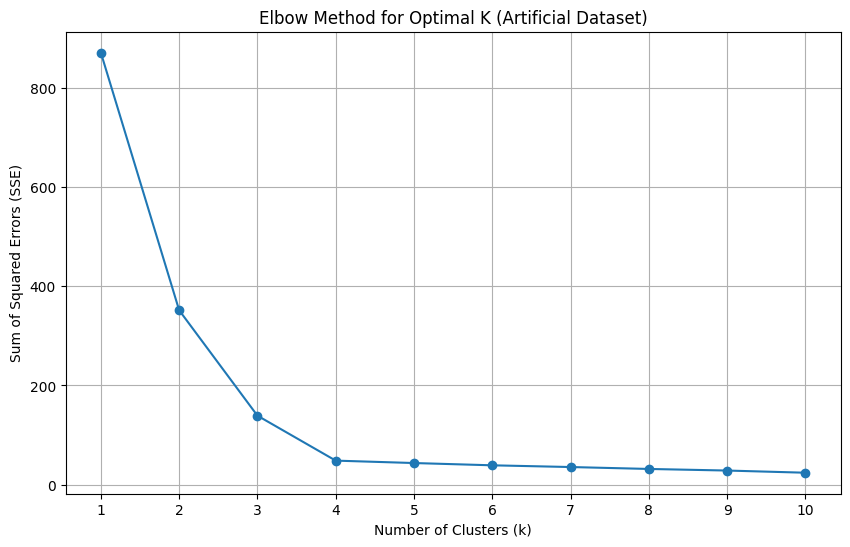


--- Starting analysis of Wholesale Customer Data ---
Loading data...
Applying PCA for dimensionality reduction...
Cumulative explained variance ratios: [0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


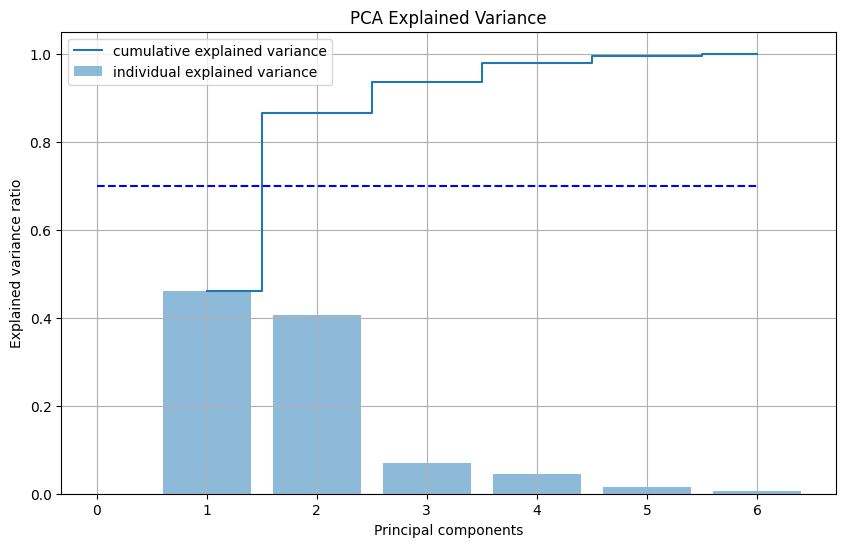


--- Running Silhouette Method to find optimal K ---

Clustering with k = 2...
Average Silhouette Score for k=2: 0.5426


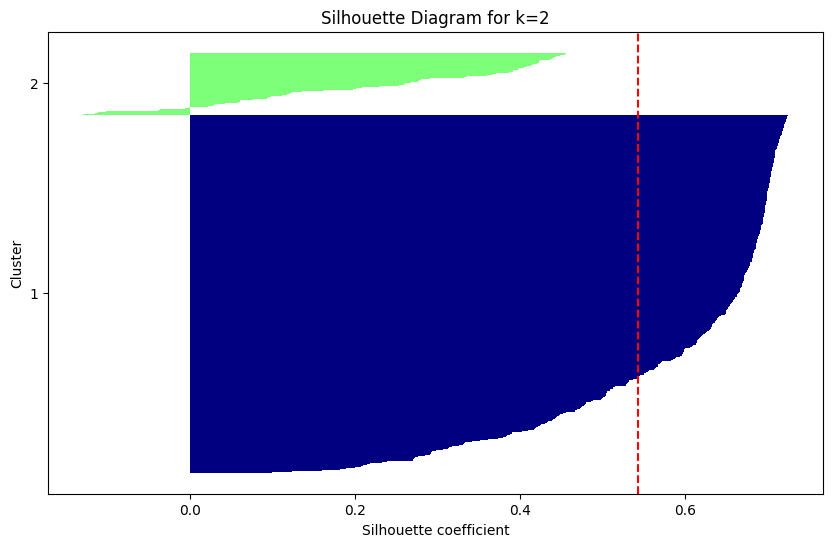


Clustering with k = 3...
Average Silhouette Score for k=3: 0.5229


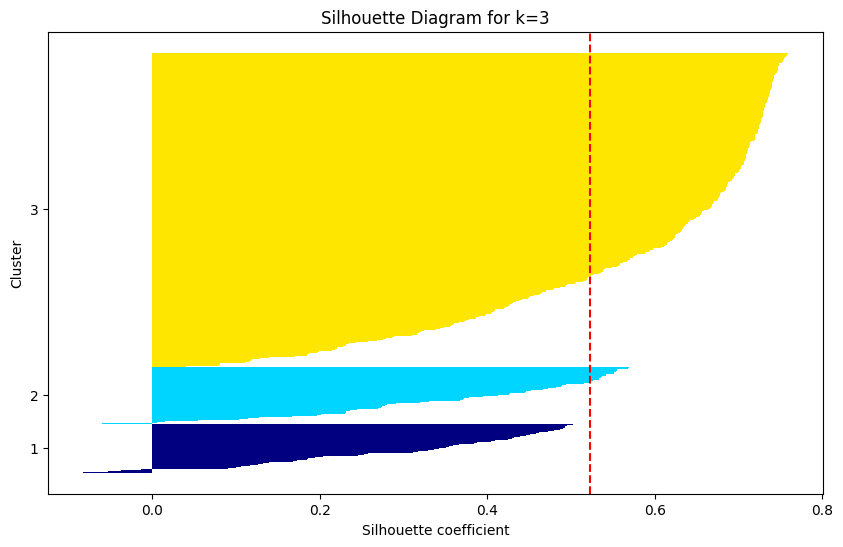


Clustering with k = 4...
Average Silhouette Score for k=4: 0.4543


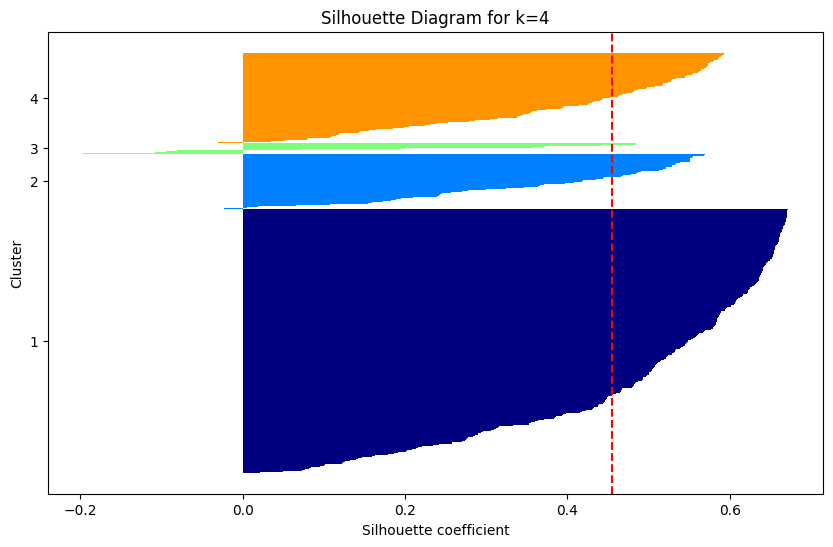


Clustering with k = 5...
Average Silhouette Score for k=5: 0.4519


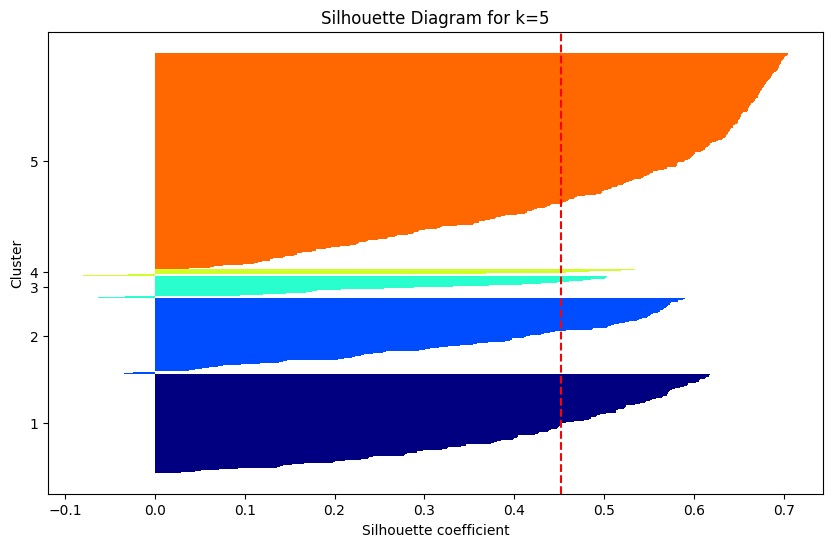


--- Comparing K-means clusters (k=3) with known groups ---


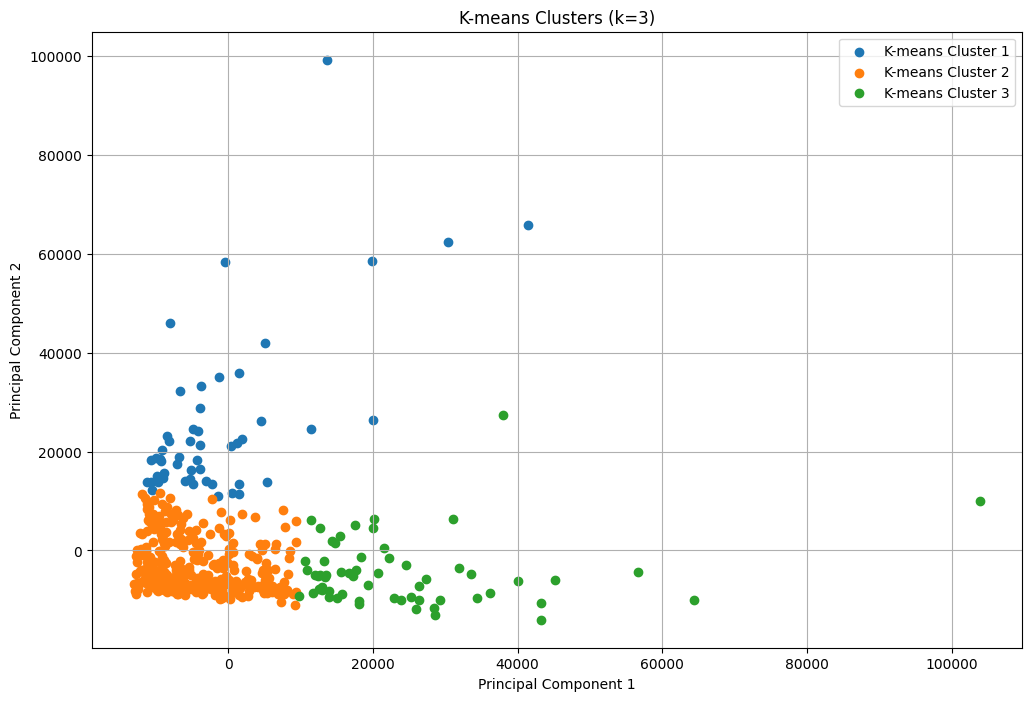

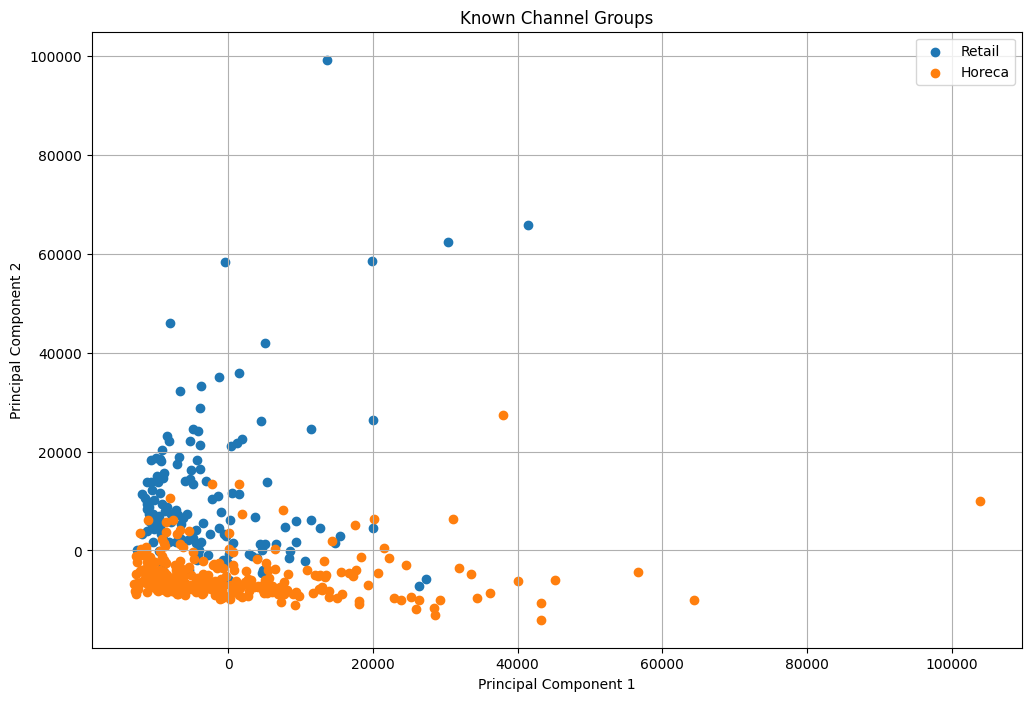

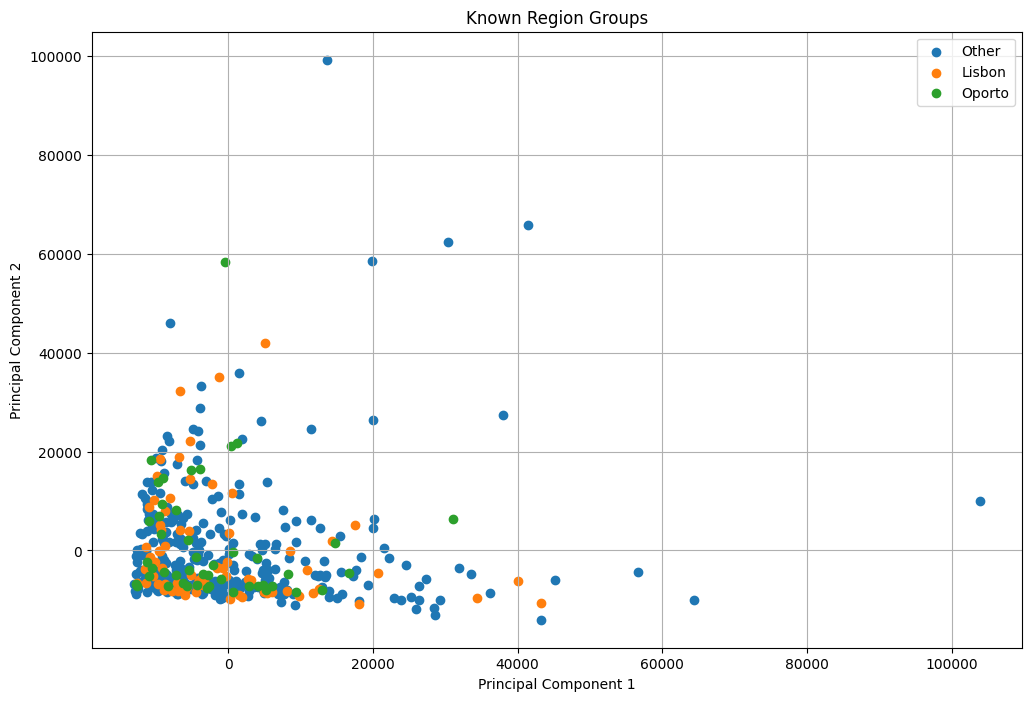


--- Problem 12: Finding useful information for wholesalers ---
Running K-means on the 6 original monetary features with k=3...

Summary of each cluster based on average spending:
                              Fresh          Milk       Grocery       Frozen  \
Kmeans_Cluster_Direct                                                          
0                       7751.981132  17910.509434  27037.905660  1970.943396   
1                      36156.389831   6123.644068   6366.779661  6811.118644   
2                       8341.612805   3779.893293   5152.173780  2577.237805   

                       Detergents_Paper   Delicassen  
Kmeans_Cluster_Direct                                 
0                          12104.867925  2185.735849  
1                           1050.016949  3090.050847  
2                           1720.573171  1136.542683  


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from matplotlib import cm

class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Recording hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None # The cluster centroids for the current run
        self.best_centroids = None # Stores the best centroids found after n_init runs
        self.best_inertia = float('inf') # Stores the best inertia found
        self.labels = None
        self.silhouette_vals = None
        self.silhouette_avg = None

    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        if self.verbose:
            print("Starting K-means clustering with n_clusters={}, n_init={}, max_iter={}".format(
                self.n_clusters, self.n_init, self.max_iter))

        # Problem 6: Calculating with different initial values (n_init)
        # Looping through n_init to find the best clustering
        for i in range(self.n_init):
            if self.verbose:
                print(f"\n--- Starting run {i+1}/{self.n_init} ---")

            # Problem 1: Determining the initial value of the center point
            n_samples, n_features = X.shape
            random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
            self.centroids = X[random_indices].astype(float) # Ensure centroids are floats

            # Problem 5: Repeating and stopping conditions
            for iter_count in range(self.max_iter):
                # Storing the current centroids to check for convergence later
                old_centroids = self.centroids.copy()

                # Problem 3: Assigning all data points to the nearest center point
                labels = self.predict(X)

                # Problem 4: Moving the center points to the mean of their assigned data points
                new_centroids = np.zeros((self.n_clusters, n_features))
                for k in range(self.n_clusters):
                    cluster_points = X[labels == k]
                    if len(cluster_points) > 0:
                        new_centroids[k] = cluster_points.mean(axis=0)
                    else:
                        # If a cluster is empty, keep its old centroid
                        new_centroids[k] = old_centroids[k]

                # Updating the centroids
                self.centroids = new_centroids

                # Checking for convergence
                centroid_movement = np.sum(np.linalg.norm(self.centroids - old_centroids, axis=1))
                if self.verbose:
                    print(f"Iteration {iter_count+1}/{self.max_iter}: Centroid movement = {centroid_movement:.6f}")

                if centroid_movement < self.tol:
                    if self.verbose:
                        print("Converged.")
                    break

            # Calculating the final SSE for this run and check if it's the best
            final_sse = self._calculate_sse(X, self.centroids, labels)
            if self.verbose:
                print(f"Final SSE for this run: {final_sse:.4f}")

            if final_sse < self.best_inertia:
                self.best_inertia = final_sse
                self.best_centroids = self.centroids.copy()
                if self.verbose:
                    print(f"New best inertia found: {self.best_inertia:.4f}")

        # Setting the final centroids and labels for the best run
        self.centroids = self.best_centroids
        self.labels = self.predict(X)
        self.silhouette_vals, self.silhouette_avg = self._calculate_silhouette_score(X)

    def _calculate_sse(self, X, centroids, labels):
        """
        Calculates the Sum of Squared Errors (SSE).

        Args:
            X (np.ndarray): Data points.
            centroids (np.ndarray): Centroid coordinates.
            labels (np.ndarray): Cluster labels for each data point.

        Returns:
            float: The calculated SSE.
        """
        sse = 0.0
        for i in range(len(X)):
            # Squared Euclidean distance between a point and its assigned centroid
            sse += np.sum((X[i] - centroids[labels[i]])**2)
        return sse

    def predict(self, X):
        """
        Problem 3 & 7: Calculate which cluster the input data belongs to

        This method assigns each data point to its nearest centroid
        using Euclidean distance. This is used for both training assignment
        and predicting new data.
        """
        labels = np.zeros(X.shape[0], dtype=int)

        # Iterating through each data point
        for i, point in enumerate(X):
            # Calculating the Euclidean distance to all centroids
            distances = np.linalg.norm(self.centroids - point, axis=1)
            # Assigning the point to the cluster with the minimum distance
            labels[i] = np.argmin(distances)

        return labels

    def _calculate_silhouette_score(self, X):
        """
        Problem 9: Calculates the silhouette coefficient for each sample.

        Args:
            X (np.ndarray): The dataset.

        Returns:
            tuple: A tuple containing (silhouette_vals, silhouette_avg).
        """
        if self.n_clusters == 1:
            return np.zeros(X.shape[0]), 0.0

        n_samples = X.shape[0]
        silhouette_vals = np.zeros(n_samples)

        for i, point_i in enumerate(X):
            # Finding the cohesion (a_n)
            cluster_i = self.labels[i]
            points_in_cluster = X[self.labels == cluster_i]
            if len(points_in_cluster) > 1:
                distances_to_same_cluster = np.linalg.norm(points_in_cluster - point_i, axis=1)
                cohesion_a = np.sum(distances_to_same_cluster) / (len(distances_to_same_cluster) - 1)
            else:
                cohesion_a = 0

            # Finding the separation (b_n)
            other_clusters = np.unique(self.labels[self.labels != cluster_i])
            if len(other_clusters) == 0:
                silhouette_vals[i] = 0 # No other clusters to compare
                continue

            avg_distances_to_others = []
            for other_cluster in other_clusters:
                points_in_other_cluster = X[self.labels == other_cluster]
                distances_to_other_cluster = np.linalg.norm(points_in_other_cluster - point_i, axis=1)
                avg_distances_to_others.append(np.mean(distances_to_other_cluster))

            separation_b = np.min(avg_distances_to_others)

            # Calculating silhouette coefficient s_n
            if cohesion_a > separation_b:
                silhouette_vals[i] = (separation_b - cohesion_a) / cohesion_a
            else:
                silhouette_vals[i] = (separation_b - cohesion_a) / separation_b

        silhouette_avg = np.mean(silhouette_vals)
        return silhouette_vals, silhouette_avg

# Helper function to plot the silhouette diagram
def plot_silhouette_diagram(silhouette_vals, silhouette_avg, cluster_labels, n_clusters):
    """
    Plots the silhouette diagram as provided in the problem description.
    """
    plt.figure(figsize=(10, 6))
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(np.unique(cluster_labels)):
        c_silhouette_vals = silhouette_vals[cluster_labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(
            range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor="none",
            color=color,
        )
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, np.unique(cluster_labels) + 1)
    plt.ylabel("Cluster")
    plt.xlabel("Silhouette coefficient")
    plt.title(f"Silhouette Diagram for k={n_clusters}")
    plt.show()

# Artificial dataset for clustering
X, _ = make_blobs(
    n_samples=100,
    n_features=2,
    centers=4,
    cluster_std=0.5,
    shuffle=True,
    random_state=0,
)

# Example usage
if __name__ == "__main__":
    # Example to test the basic K-means algorithm
    print("--- Testing basic K-means implementation ---")
    kmeans = ScratchKMeans(n_clusters=4, n_init=3, max_iter=100, tol=1e-5, verbose=True)
    kmeans.fit(X)
    print(f"\nFinal best SSE after {kmeans.n_init} runs: {kmeans.best_inertia:.4f}")

    # Problem 8: Implementation of elbow method
    print("\n--- Running Elbow Method to find optimal K ---")
    sse_values = []
    k_range = range(1, 11)

    for k in k_range:
        print(f"\nClustering with k = {k}...")
        kmeans = ScratchKMeans(n_clusters=k, n_init=5, max_iter=100, tol=1e-5, verbose=False)
        kmeans.fit(X)
        sse_values.append(kmeans.best_inertia)
        print(f"Completed. Best SSE for k={k} is {kmeans.best_inertia:.4f}")

    # Plotting the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, sse_values, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Elbow Method for Optimal K (Artificial Dataset)')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

    # Problem 9: Implementation of silhouette method and data analysis
    print("\n--- Starting analysis of Wholesale Customer Data ---")

    # Part 9a: Loading and preprocessing data
    print("Loading data...")
    try:
        df = pd.read_csv('Wholesale customers data.csv')
    except FileNotFoundError:
        print("Wholesale customers data.csv not found. Please ensure the file is in the correct path.")
        exit()

    # Removing non-monetary features
    X_data = df.drop(columns=['Channel', 'Region'])

    # Part 9b: Dimensionality reduction with PCA
    print("Applying PCA for dimensionality reduction...")
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_data)

    # Plot the explained variance ratio
    pca_full = PCA(n_components=None)
    pca_full.fit(X_data)
    var_exp = pca_full.explained_variance_ratio_
    cum_var_exp = np.cumsum(var_exp)
    print("Cumulative explained variance ratios:", cum_var_exp)

    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(var_exp) + 1), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(1, len(var_exp) + 1), cum_var_exp, where='mid', label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.hlines(0.7, 0, len(var_exp), "blue", linestyles='dashed')
    plt.legend(loc='best')
    plt.grid()
    plt.title('PCA Explained Variance')
    plt.show()

    # Part 9c: Running K-means with the silhouette method
    print("\n--- Running Silhouette Method to find optimal K ---")
    for k in range(2, 6): # Test a smaller range for practicality
        print(f"\nClustering with k = {k}...")
        kmeans_sil = ScratchKMeans(n_clusters=k, n_init=5, max_iter=100, tol=1e-5, verbose=False)
        kmeans_sil.fit(X_pca)

        print(f"Average Silhouette Score for k={k}: {kmeans_sil.silhouette_avg:.4f}")

        # Part 9d: Plotting the silhouette diagram
        plot_silhouette_diagram(
            silhouette_vals=kmeans_sil.silhouette_vals,
            silhouette_avg=kmeans_sil.silhouette_avg,
            cluster_labels=kmeans_sil.labels,
            n_clusters=k
        )

    # Problem 10: Selection of the number of clusters k
    optimal_k = 3

    # Problem 11: Comparison with known groups
    print(f"\n--- Comparing K-means clusters (k={optimal_k}) with known groups ---")

    # Get the K-means labels for the optimal k
    kmeans_optimal = ScratchKMeans(n_clusters=optimal_k, n_init=5, max_iter=100, tol=1e-5, verbose=False)
    kmeans_optimal.fit(X_pca)
    kmeans_labels = kmeans_optimal.labels

    # Map Channel and Region labels to something more descriptive for the legend
    channel_map = {1: 'Horeca', 2: 'Retail'}
    region_map = {1: 'Lisbon', 2: 'Oporto', 3: 'Other'}
    df['Channel_Name'] = df['Channel'].map(channel_map)
    df['Region_Name'] = df['Region'].map(region_map)

    # Plot 1: K-means Clusters
    plt.figure(figsize=(12, 8))
    for i in range(optimal_k):
        plt.scatter(X_pca[kmeans_labels == i, 0], X_pca[kmeans_labels == i, 1],
                    label=f'K-means Cluster {i+1}')
    plt.title(f'K-means Clusters (k={optimal_k})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot 2: Known Channel Groups
    plt.figure(figsize=(12, 8))
    for channel in df['Channel_Name'].unique():
        plt.scatter(X_pca[df['Channel_Name'] == channel, 0], X_pca[df['Channel_Name'] == channel, 1],
                    label=channel)
    plt.title('Known Channel Groups')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot 3: Known Region Groups
    plt.figure(figsize=(12, 8))
    for region in df['Region_Name'].unique():
        plt.scatter(X_pca[df['Region_Name'] == region, 0], X_pca[df['Region_Name'] == region, 1],
                    label=region)
    plt.title('Known Region Groups')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Problem 12: Useful information for wholesalers
    print(f"\n--- Problem 12: Finding useful information for wholesalers ---")

    # Selecting the 6 monetary features
    monetary_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
    X_monetary = df[monetary_features].values

    # Run K-means on the original features with k=3
    print(f"Running K-means on the 6 original monetary features with k={optimal_k}...")
    kmeans_monetary = ScratchKMeans(n_clusters=optimal_k, n_init=5, max_iter=100, tol=1e-5, verbose=False)
    kmeans_monetary.fit(X_monetary)

    # Add the cluster labels to the original DataFrame
    df['Kmeans_Cluster_Direct'] = kmeans_monetary.labels

    # Calculate the mean of each feature for each cluster
    cluster_summary = df.groupby('Kmeans_Cluster_Direct')[monetary_features].mean()
    print("\nSummary of each cluster based on average spending:")
    print(cluster_summary)

Analysis of the Clusters

The groupby table shows the average annual spending in each category for each of the three clusters. The clusters represent distinct customer segments based on their purchasing behavior:

Cluster 0 (High Spenders): This cluster contains customers with the highest average spending across almost all categories, especially on Fresh and Grocery products. They are likely large supermarkets or restaurant chains that purchase a wide variety of goods in large quantities.

Cluster 1 (Horeca-Focused): This cluster spends significantly more on Fresh products than other categories, with very low spending on things like Detergents_Paper and Grocery. This behavior is characteristic of the Horeca (Hotel/Restaurant/Cafe) channel, confirming our observation from Problem 11. These customers likely specialize in fresh, perishable goods for daily use.

Cluster 2 (Retail/Grocery-Focused): This cluster shows a high average spend on Grocery, Milk, and Detergents_Paper. This pattern aligns well with the Retail channel, such as small grocery stores or convenience shops, that need a steady supply of these non-perishable goods.

Wholesalers can now:

1. Tailor promotions to each group's spending patterns (e.g., offer bulk discounts on fresh products for the Horeca cluster).

2. Optimize product assortment to better serve the needs of each cluster.

3. Allocate sales resources more effectively, dedicating more attention to the high-spending customers in Cluster 0.



**13. Investigation of other methods**

DBSCAN (Clustering)
DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. Unlike K-means, which finds clusters based on the distance to a center point, DBSCAN finds clusters in regions of high point density.

Advantages:

No need to specify the number of clusters: The algorithm automatically finds a suitable number of clusters based on the data's density.

Finds arbitrary shapes: It can find clusters that are non-spherical and have complex, irregular shapes.

Robust to outliers: It effectively handles "noise" or outliers by classifying them as points that don't belong to any cluster.

Disadvantages:

Sensitive to parameters: The algorithm's performance is highly dependent on two parameters: eps (the maximum distance between two points to be considered neighbors) and minPts (the minimum number of points required to form a dense region). Choosing the right values can be challenging, especially for datasets without a clear density separation.

Struggles with varying densities: If the dataset contains clusters of significantly different densities, a single set of eps and minPts values may not work well for all clusters.

Here's an example of DBSCAN code
```python
# DBSCAN key advantages demonstration
from sklearn.cluster import DBSCAN
import numpy as np

# Example where DBSCAN excels over K-means
X_complex = np.concatenate([
    np.random.normal(0, 0.3, (100, 2)),
    np.random.normal(3, 0.3, (100, 2)),
    np.random.normal(6, 0.3, (100, 2)),
    np.random.uniform(-2, 8, (50, 2))  # Noise points
])

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_complex)

print("DBSCAN advantages:")
print("- Can identify arbitrary-shaped clusters ✓")
print("- Automatically detects noise points ✓")
print("- Doesn't require specifying number of clusters ✓")
print(f"- Found {len(np.unique(dbscan_labels))-1} clusters + noise")
```
t-SNE (Dimensionality Reduction)
t-SNE (t-Distributed Stochastic Neighbor Embedding) is a non-linear dimensionality reduction technique that is particularly useful for visualizing high-dimensional data in 2 or 3 dimensions.

Advantages:

Preserves local structure: It excels at keeping similar data points close together in the low-dimensional space, making it excellent for visualizing and identifying clusters.

Captures non-linear relationships: Unlike PCA, t-SNE can uncover complex, non-linear patterns that may be hidden in the original high-dimensional space.

Creates clear visual separations: The output plots often show a high degree of separation between different clusters, making it easy to see the data's inherent structure.

Disadvantages:

Computationally expensive: t-SNE is much slower than PCA, especially for large datasets, as it needs to calculate the distance between every pair of points.

No global structure preservation: While it's great at preserving local relationships, the distances between clusters in the t-SNE plot may not accurately reflect their distances in the original high-dimensional space. You shouldn't interpret the relative spacing between clusters.

Sensitive to hyperparameters: The results can be significantly influenced by the perplexity parameter, which can be thought of as the number of neighbors a point considers.

Here's an example of t-SNE code
```python
# t-SNE demonstration for visualization
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

digits = load_digits()
X_digits = digits.data
y_digits = digits.target

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_digits)

print("t-SNE advantages:")
print("- Excellent for visualizing high-dimensional data ✓")
print("- Preserves local neighborhood structure ✓")
print("- Effective for revealing cluster patterns ✓")
```
LLE (Dimensionality Reduction)
LLE (Locally Linear Embedding) is another non-linear dimensionality reduction technique that is different from PCA and t-SNE. Its goal is to find a low-dimensional embedding of the data that preserves the local neighborhood of each point.

Advantages:

Handles non-linear data: It can unfold complex, non-linear manifolds, making it effective for datasets with curved or twisted structures that PCA can't handle.

Focuses on local relationships: The core idea is that each data point can be reconstructed as a weighted sum of its neighbors, which is then preserved in the lower-dimensional space. This makes it good at preserving the data's local geometry.

Requires no hyperparameters: Unlike t-SNE, LLE has fewer parameters to tune, making it simpler to use in some cases.

Disadvantages:

Sensitive to the number of neighbors: While it has fewer parameters, the choice of the number of neighbors to consider for each point is a critical decision that can dramatically affect the outcome.

Not robust to noise: LLE can perform poorly with noisy data or when there are a lot of outliers, as it assumes the local neighborhood is a good representation of the data.

Can be slow: Like other non-linear methods, LLE can be computationally intensive, especially for large datasets.

Here's an example of LLE code
```python
# LLE demonstration
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.datasets import make_swiss_roll

X_swiss, _ = make_swiss_roll(n_samples=1000, noise=0.1)

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=12)
X_lle = lle.fit_transform(X_swiss)

print("LLE advantages:")
print("- Preserves local geometric relationships ✓")
print("- Handles non-linear manifolds well ✓")
print("- Deterministic results ✓")
```


**14. Use of t-SNE and DBSCAN**

--- Testing basic K-means implementation ---
Starting K-means clustering with n_clusters=4, n_init=3, max_iter=100

--- Starting run 1/3 ---
Iteration 1/100: Centroid movement = 6.026044
Iteration 2/100: Centroid movement = 2.338992
Iteration 3/100: Centroid movement = 0.000000
Converged.
Final SSE for this run: 48.6338
New best inertia found: 48.6338

--- Starting run 2/3 ---
Iteration 1/100: Centroid movement = 7.526542
Iteration 2/100: Centroid movement = 2.242947
Iteration 3/100: Centroid movement = 2.313309
Iteration 4/100: Centroid movement = 1.285781
Iteration 5/100: Centroid movement = 0.000000
Converged.
Final SSE for this run: 48.6338

--- Starting run 3/3 ---
Iteration 1/100: Centroid movement = 3.120881
Iteration 2/100: Centroid movement = 3.615528
Iteration 3/100: Centroid movement = 1.366747
Iteration 4/100: Centroid movement = 0.000000
Converged.
Final SSE for this run: 48.6338

Final best SSE after 3 runs: 48.6338

--- Running Elbow Method to find optimal K ---

Cluster

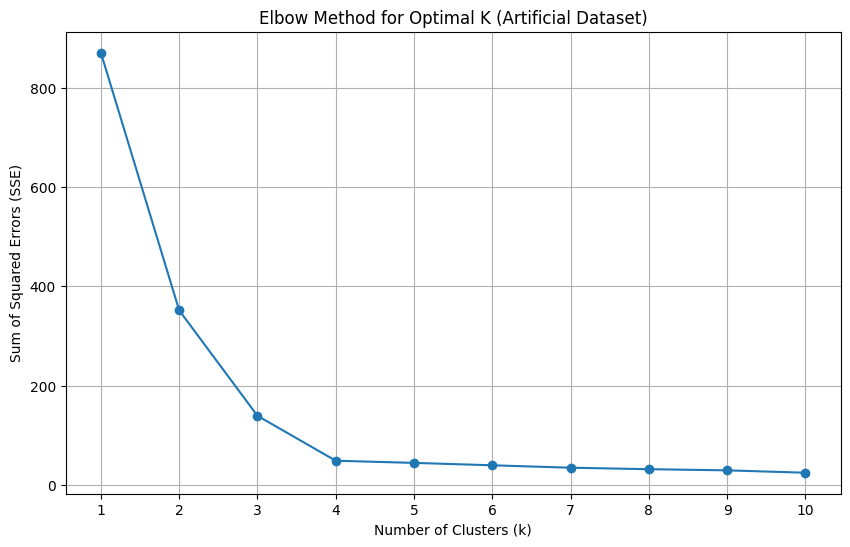


--- Starting analysis of Wholesale Customer Data ---
Loading data...
Applying PCA for dimensionality reduction...
Cumulative explained variance ratios: [0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


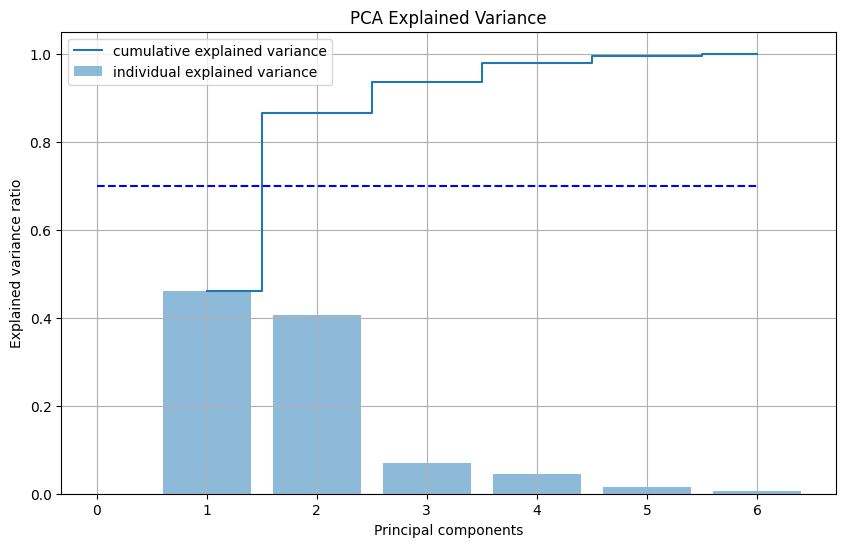


--- Running Silhouette Method to find optimal K ---

Clustering with k = 2...
Average Silhouette Score for k=2: 0.5426


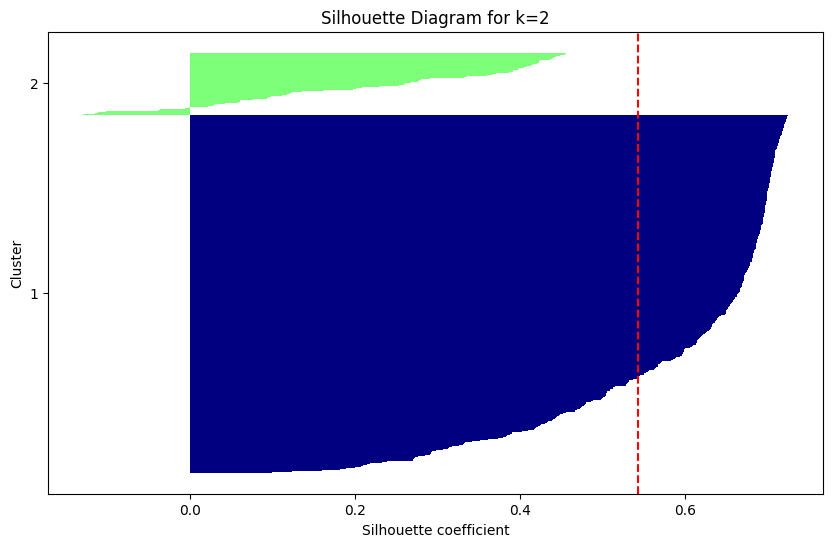


Clustering with k = 3...
Average Silhouette Score for k=3: 0.5229


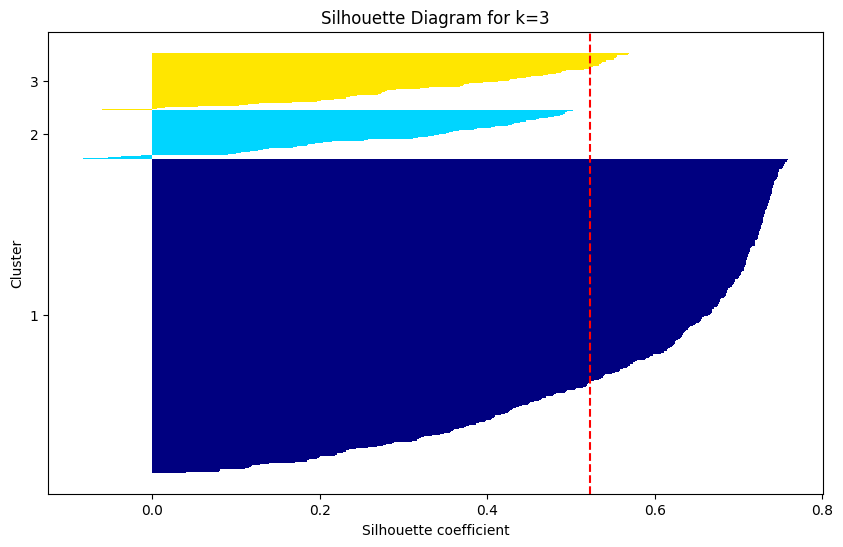


Clustering with k = 4...
Average Silhouette Score for k=4: 0.4543


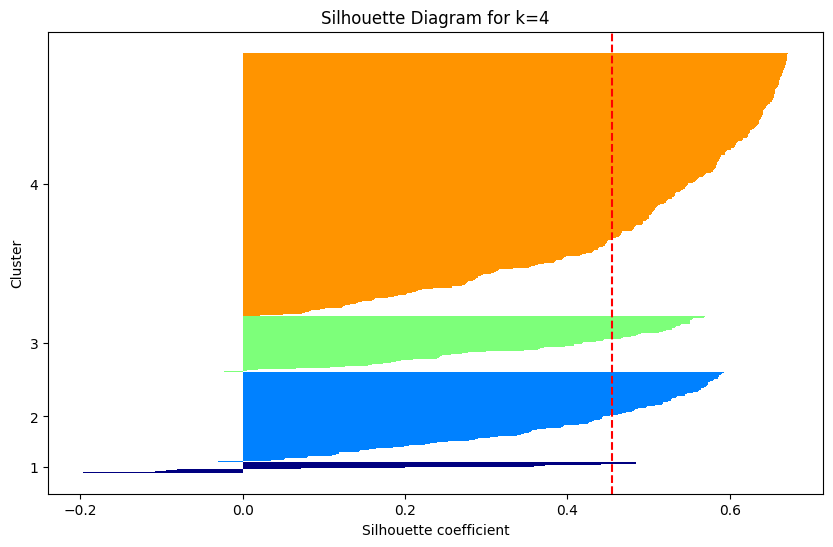


Clustering with k = 5...
Average Silhouette Score for k=5: 0.4519


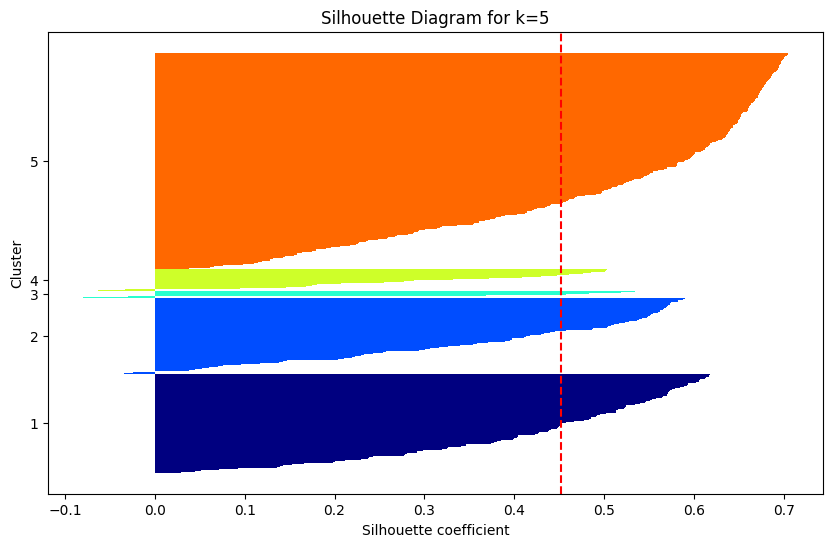


--- Comparing K-means clusters (k=3) with known groups ---


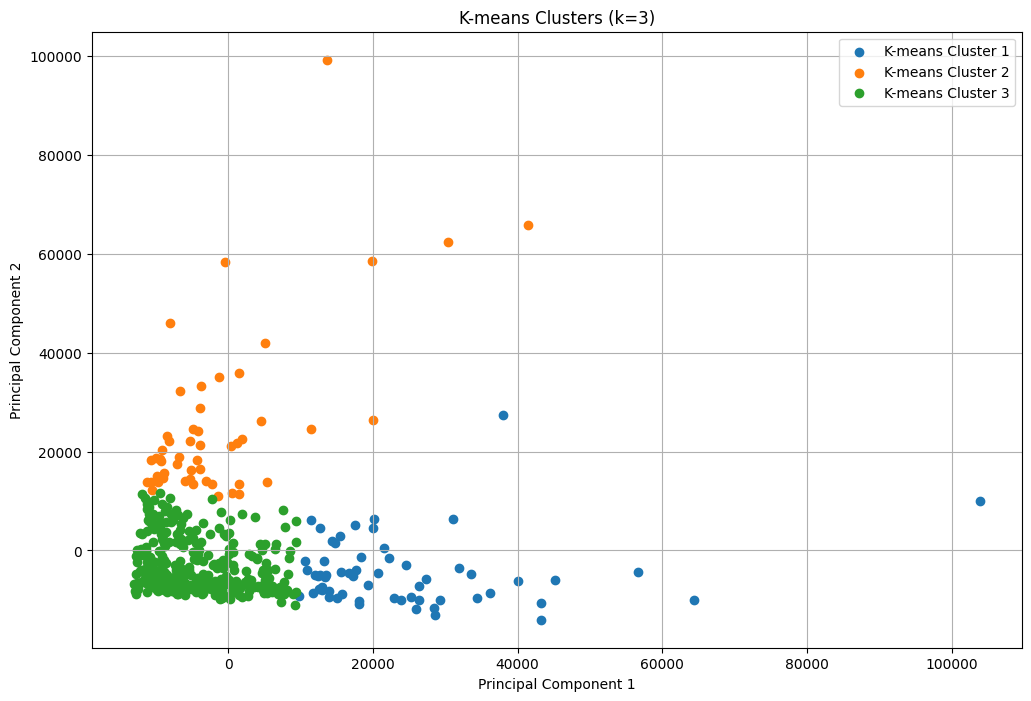

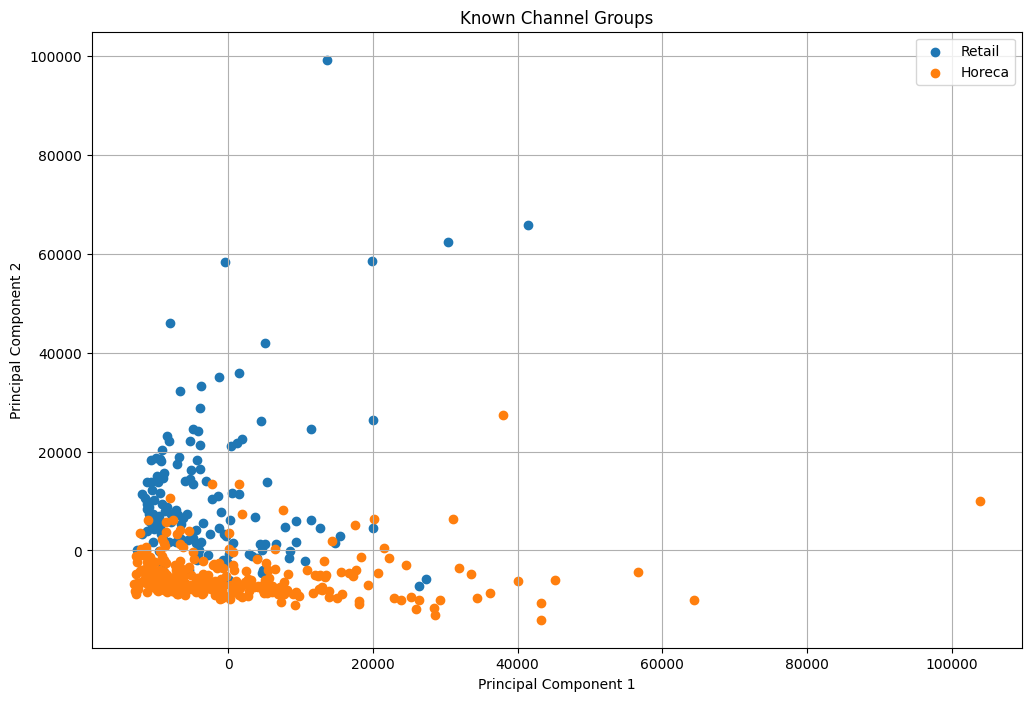

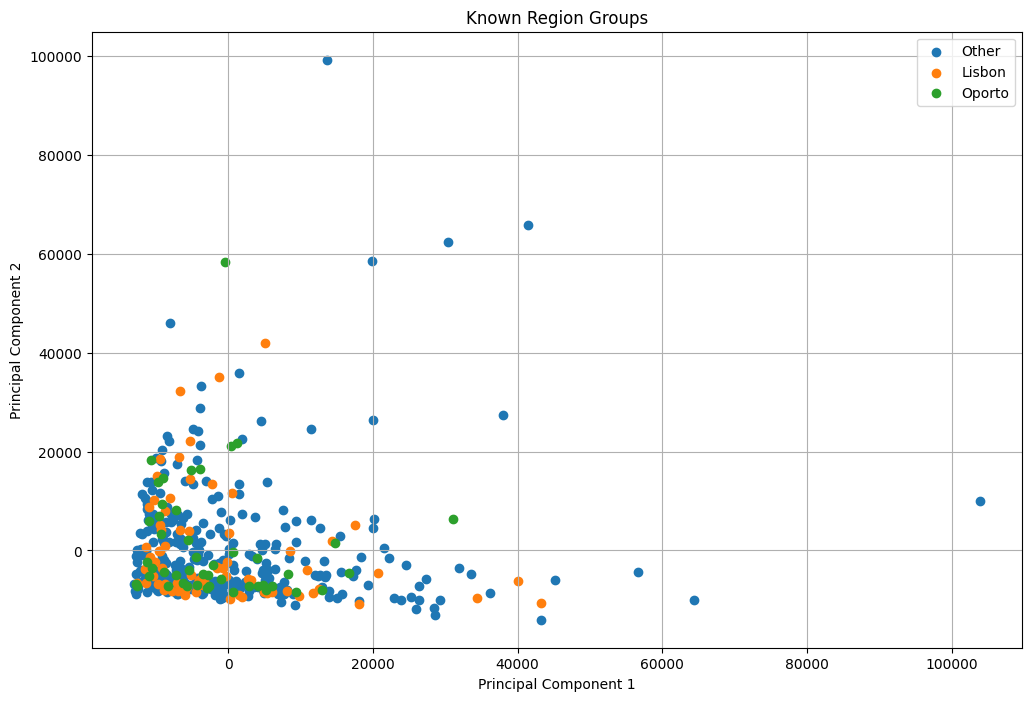


--- Problem 12: Finding useful information for wholesalers ---
Running K-means on the 6 original monetary features with k=3...

Summary of each cluster based on average spending:
                              Fresh          Milk       Grocery       Frozen  \
Kmeans_Cluster_Direct                                                          
0                       8249.996960   3800.966565   5248.556231  2571.677812   
1                      35941.400000   6044.450000   6288.616667  6713.966667   
2                       8027.411765  18375.921569  27342.549020  2014.313725   

                       Detergents_Paper   Delicassen  
Kmeans_Cluster_Direct                                 
0                           1755.112462  1137.018237  
1                           1039.666667  3049.466667  
2                          12314.607843  2233.254902  

--- Problem 14: Comparing t-SNE + DBSCAN with PCA + K-means ---
Applying t-SNE for dimensionality reduction...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


Applying DBSCAN for clustering...
DBSCAN found 5 clusters (including noise).
DBSCAN labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  2 -1  0
 -1  2  3 -1 -1 -1 -1 -1 -1 -1 -

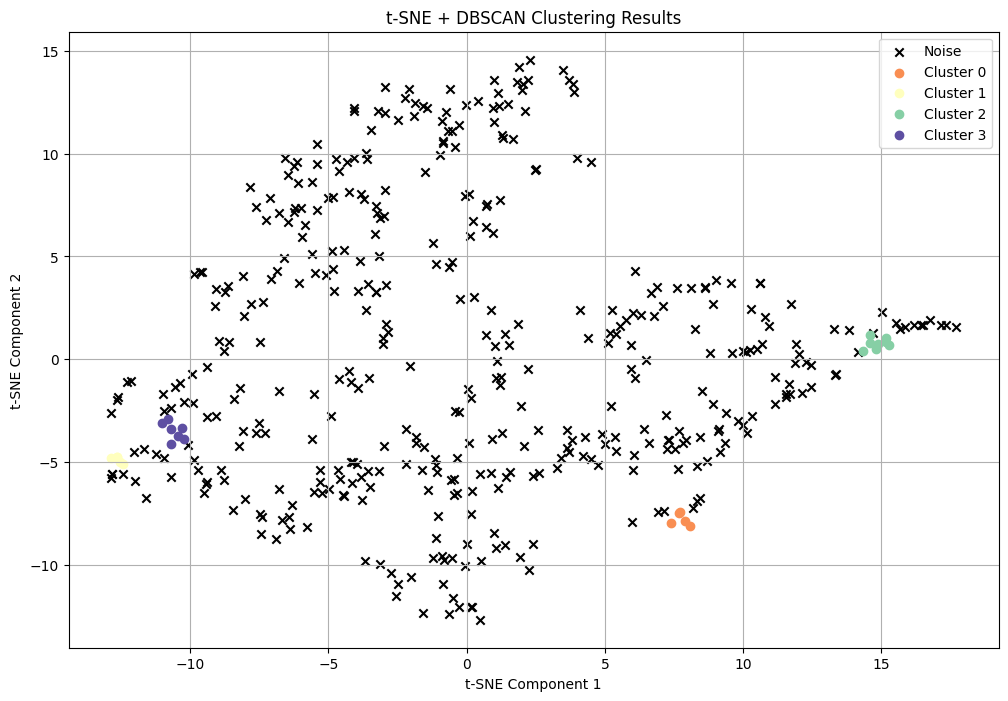


Compare the DBSCAN plot with the PCA + K-means plots above.
Notice how DBSCAN handles noise points and finds clusters of varying shapes.


In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
from matplotlib import cm

class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Recording hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.centroids = None # The cluster centroids for the current run
        self.best_centroids = None # Stores the best centroids found after n_init runs
        self.best_inertia = float('inf') # Stores the best inertia found
        self.labels = None
        self.silhouette_vals = None
        self.silhouette_avg = None

    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """
        if self.verbose:
            print("Starting K-means clustering with n_clusters={}, n_init={}, max_iter={}".format(
                self.n_clusters, self.n_init, self.max_iter))

        # Problem 6: Calculating with different initial values (n_init)
        # Looping through n_init to find the best clustering
        for i in range(self.n_init):
            if self.verbose:
                print(f"\n--- Starting run {i+1}/{self.n_init} ---")

            # Problem 1: Determining the initial value of the center point
            n_samples, n_features = X.shape
            random_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
            self.centroids = X[random_indices].astype(float) # Ensure centroids are floats

            # Problem 5: Repeating and stopping conditions
            for iter_count in range(self.max_iter):
                # Storing the current centroids to check for convergence later
                old_centroids = self.centroids.copy()

                # Problem 3: Assigning all data points to the nearest center point
                labels = self.predict(X)

                # Problem 4: Moving the center points to the mean of their assigned data points
                new_centroids = np.zeros((self.n_clusters, n_features))
                for k in range(self.n_clusters):
                    cluster_points = X[labels == k]
                    if len(cluster_points) > 0:
                        new_centroids[k] = cluster_points.mean(axis=0)
                    else:
                        # If a cluster is empty, keep its old centroid
                        new_centroids[k] = old_centroids[k]

                # Updating the centroids
                self.centroids = new_centroids

                # Checking for convergence
                centroid_movement = np.sum(np.linalg.norm(self.centroids - old_centroids, axis=1))
                if self.verbose:
                    print(f"Iteration {iter_count+1}/{self.max_iter}: Centroid movement = {centroid_movement:.6f}")

                if centroid_movement < self.tol:
                    if self.verbose:
                        print("Converged.")
                    break

            # Calculating the final SSE for this run and check if it's the best
            final_sse = self._calculate_sse(X, self.centroids, labels)
            if self.verbose:
                print(f"Final SSE for this run: {final_sse:.4f}")

            if final_sse < self.best_inertia:
                self.best_inertia = final_sse
                self.best_centroids = self.centroids.copy()
                if self.verbose:
                    print(f"New best inertia found: {self.best_inertia:.4f}")

        # Setting the final centroids and labels for the best run
        self.centroids = self.best_centroids
        self.labels = self.predict(X)
        self.silhouette_vals, self.silhouette_avg = self._calculate_silhouette_score(X)

    def _calculate_sse(self, X, centroids, labels):
        """
        Calculates the Sum of Squared Errors (SSE).

        Args:
            X (np.ndarray): Data points.
            centroids (np.ndarray): Centroid coordinates.
            labels (np.ndarray): Cluster labels for each data point.

        Returns:
            float: The calculated SSE.
        """
        sse = 0.0
        for i in range(len(X)):
            # Squared Euclidean distance between a point and its assigned centroid
            sse += np.sum((X[i] - centroids[labels[i]])**2)
        return sse

    def predict(self, X):
        """
        Problem 3 & 7: Calculate which cluster the input data belongs to

        This method assigns each data point to its nearest centroid
        using Euclidean distance. This is used for both training assignment
        and predicting new data.
        """
        labels = np.zeros(X.shape[0], dtype=int)

        # Iterating through each data point
        for i, point in enumerate(X):
            # Calculating the Euclidean distance to all centroids
            distances = np.linalg.norm(self.centroids - point, axis=1)
            # Assigning the point to the cluster with the minimum distance
            labels[i] = np.argmin(distances)

        return labels

    def _calculate_silhouette_score(self, X):
        """
        Problem 9: Calculates the silhouette coefficient for each sample.

        Args:
            X (np.ndarray): The dataset.

        Returns:
            tuple: A tuple containing (silhouette_vals, silhouette_avg).
        """
        if self.n_clusters == 1:
            return np.zeros(X.shape[0]), 0.0

        n_samples = X.shape[0]
        silhouette_vals = np.zeros(n_samples)

        for i, point_i in enumerate(X):
            # Finding the cohesion (a_n)
            cluster_i = self.labels[i]
            points_in_cluster = X[self.labels == cluster_i]
            if len(points_in_cluster) > 1:
                distances_to_same_cluster = np.linalg.norm(points_in_cluster - point_i, axis=1)
                cohesion_a = np.sum(distances_to_same_cluster) / (len(distances_to_same_cluster) - 1)
            else:
                cohesion_a = 0

            # Finding the separation (b_n)
            other_clusters = np.unique(self.labels[self.labels != cluster_i])
            if len(other_clusters) == 0:
                silhouette_vals[i] = 0 # No other clusters to compare
                continue

            avg_distances_to_others = []
            for other_cluster in other_clusters:
                points_in_other_cluster = X[self.labels == other_cluster]
                distances_to_other_cluster = np.linalg.norm(points_in_other_cluster - point_i, axis=1)
                avg_distances_to_others.append(np.mean(distances_to_other_cluster))

            separation_b = np.min(avg_distances_to_others)

            # Calculating silhouette coefficient s_n
            if cohesion_a > separation_b:
                silhouette_vals[i] = (separation_b - cohesion_a) / cohesion_a
            else:
                silhouette_vals[i] = (separation_b - cohesion_a) / separation_b

        silhouette_avg = np.mean(silhouette_vals)
        return silhouette_vals, silhouette_avg

# Helper function to plot the silhouette diagram
def plot_silhouette_diagram(silhouette_vals, silhouette_avg, cluster_labels, n_clusters):
    """
    Plots the silhouette diagram as provided in the problem description.
    """
    plt.figure(figsize=(10, 6))
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []
    for i, c in enumerate(np.unique(cluster_labels)):
        c_silhouette_vals = silhouette_vals[cluster_labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(
            range(y_ax_lower, y_ax_upper),
            c_silhouette_vals,
            height=1.0,
            edgecolor="none",
            color=color,
        )
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, np.unique(cluster_labels) + 1)
    plt.ylabel("Cluster")
    plt.xlabel("Silhouette coefficient")
    plt.title(f"Silhouette Diagram for k={n_clusters}")
    plt.show()

# Artificial dataset for clustering
X, _ = make_blobs(
    n_samples=100,
    n_features=2,
    centers=4,
    cluster_std=0.5,
    shuffle=True,
    random_state=0,
)

# Example usage
if __name__ == "__main__":
    # Example to test the basic K-means algorithm
    print("--- Testing basic K-means implementation ---")
    kmeans = ScratchKMeans(n_clusters=4, n_init=3, max_iter=100, tol=1e-5, verbose=True)
    kmeans.fit(X)
    print(f"\nFinal best SSE after {kmeans.n_init} runs: {kmeans.best_inertia:.4f}")

    # Problem 8: Implementation of elbow method
    print("\n--- Running Elbow Method to find optimal K ---")
    sse_values = []
    k_range = range(1, 11)

    for k in k_range:
        print(f"\nClustering with k = {k}...")
        kmeans = ScratchKMeans(n_clusters=k, n_init=5, max_iter=100, tol=1e-5, verbose=False)
        kmeans.fit(X)
        sse_values.append(kmeans.best_inertia)
        print(f"Completed. Best SSE for k={k} is {kmeans.best_inertia:.4f}")

    # Plotting the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, sse_values, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Elbow Method for Optimal K (Artificial Dataset)')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()

    # Problem 9: Implementation of silhouette method and data analysis
    print("\n--- Starting analysis of Wholesale Customer Data ---")

    # Part 9a: Loading and preprocessing data
    print("Loading data...")
    try:
        df = pd.read_csv('Wholesale customers data.csv')
    except FileNotFoundError:
        print("Wholesale customers data.csv not found. Please ensure the file is in the correct path.")
        exit()

    # Removing non-monetary features
    X_data = df.drop(columns=['Channel', 'Region'])

    # Part 9b: Dimensionality reduction with PCA
    print("Applying PCA for dimensionality reduction...")
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_data)

    # Plot the explained variance ratio
    pca_full = PCA(n_components=None)
    pca_full.fit(X_data)
    var_exp = pca_full.explained_variance_ratio_
    cum_var_exp = np.cumsum(var_exp)
    print("Cumulative explained variance ratios:", cum_var_exp)

    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(var_exp) + 1), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(1, len(var_exp) + 1), cum_var_exp, where='mid', label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.hlines(0.7, 0, len(var_exp), "blue", linestyles='dashed')
    plt.legend(loc='best')
    plt.grid()
    plt.title('PCA Explained Variance')
    plt.show()

    # Part 9c: Running K-means with the silhouette method
    print("\n--- Running Silhouette Method to find optimal K ---")
    for k in range(2, 6): # Test a smaller range for practicality
        print(f"\nClustering with k = {k}...")
        kmeans_sil = ScratchKMeans(n_clusters=k, n_init=5, max_iter=100, tol=1e-5, verbose=False)
        kmeans_sil.fit(X_pca)

        print(f"Average Silhouette Score for k={k}: {kmeans_sil.silhouette_avg:.4f}")

        # Part 9d: Plotting the silhouette diagram
        plot_silhouette_diagram(
            silhouette_vals=kmeans_sil.silhouette_vals,
            silhouette_avg=kmeans_sil.silhouette_avg,
            cluster_labels=kmeans_sil.labels,
            n_clusters=k
        )

    # Problem 10: Selection of the number of clusters k
    optimal_k = 3

    # Problem 11: Comparison with known groups
    print(f"\n--- Comparing K-means clusters (k={optimal_k}) with known groups ---")

    # Get the K-means labels for the optimal k
    kmeans_optimal = ScratchKMeans(n_clusters=optimal_k, n_init=5, max_iter=100, tol=1e-5, verbose=False)
    kmeans_optimal.fit(X_pca)
    kmeans_labels = kmeans_optimal.labels

    # Map Channel and Region labels to something more descriptive for the legend
    channel_map = {1: 'Horeca', 2: 'Retail'}
    region_map = {1: 'Lisbon', 2: 'Oporto', 3: 'Other'}
    df['Channel_Name'] = df['Channel'].map(channel_map)
    df['Region_Name'] = df['Region'].map(region_map)

    # Plot 1: K-means Clusters
    plt.figure(figsize=(12, 8))
    for i in range(optimal_k):
        plt.scatter(X_pca[kmeans_labels == i, 0], X_pca[kmeans_labels == i, 1],
                    label=f'K-means Cluster {i+1}')
    plt.title(f'K-means Clusters (k={optimal_k})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot 2: Known Channel Groups
    plt.figure(figsize=(12, 8))
    for channel in df['Channel_Name'].unique():
        plt.scatter(X_pca[df['Channel_Name'] == channel, 0], X_pca[df['Channel_Name'] == channel, 1],
                    label=channel)
    plt.title('Known Channel Groups')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot 3: Known Region Groups
    plt.figure(figsize=(12, 8))
    for region in df['Region_Name'].unique():
        plt.scatter(X_pca[df['Region_Name'] == region, 0], X_pca[df['Region_Name'] == region, 1],
                    label=region)
    plt.title('Known Region Groups')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Problem 12: Useful information for wholesalers
    print(f"\n--- Problem 12: Finding useful information for wholesalers ---")

    # Selecting the 6 monetary features
    monetary_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
    X_monetary = df[monetary_features].values

    # Running K-means on the original features with k=3
    print(f"Running K-means on the 6 original monetary features with k={optimal_k}...")
    kmeans_monetary = ScratchKMeans(n_clusters=optimal_k, n_init=5, max_iter=100, tol=1e-5, verbose=False)
    kmeans_monetary.fit(X_monetary)

    # Adding the cluster labels to the original DataFrame
    df['Kmeans_Cluster_Direct'] = kmeans_monetary.labels

    # Calculating the mean of each feature for each cluster
    cluster_summary = df.groupby('Kmeans_Cluster_Direct')[monetary_features].mean()
    print("\nSummary of each cluster based on average spending:")
    print(cluster_summary)

    # Problem 14: Use of t-SNE and DBSCAN
    print("\n--- Problem 14: Comparing t-SNE + DBSCAN with PCA + K-means ---")

    # Part 14a: Dimensionality Reduction with t-SNE
    print("Applying t-SNE for dimensionality reduction...")
    # The 'perplexity' parameter can be seen as a guess about the number of nearest neighbors.
    tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
    X_tsne = tsne.fit_transform(X_data)

    # Part 14b: Clustering with DBSCAN
    print("Applying DBSCAN for clustering...")
    # The default values are often a good starting point.
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_tsne)

    unique_labels = np.unique(dbscan_labels)
    n_clusters_dbscan = len(unique_labels)

    print(f"DBSCAN found {n_clusters_dbscan} clusters (including noise).")
    print(f"DBSCAN labels: {dbscan_labels}")

    # Part 14c: Plotting the DBSCAN clusters
    plt.figure(figsize=(12, 8))
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

    for k, color in zip(unique_labels, colors):
        if k == -1:
            # Black color for noise points
            color = 'k'
            marker = 'x'
            label = 'Noise'
        else:
            marker = 'o'
            label = f'Cluster {k}'

        cluster_points = X_tsne[dbscan_labels == k]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[color], marker=marker, label=label)

    plt.title('t-SNE + DBSCAN Clustering Results')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Part 14d: Comparison plots (re-using the previous ones for easy comparison)
    # The PCA + K-means plots are already generated above. This section serves as
    # a conceptual comparison point.
    print("\nCompare the DBSCAN plot with the PCA + K-means plots above.")
    print("Notice how DBSCAN handles noise points and finds clusters of varying shapes.")